In [2]:
# Data manipulation
import pandas as pd 
import numpy as np 

# Data Preprocessing
from pandas.api.types import is_numeric_dtype 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Dimensionality reduction
from sklearn.decomposition import PCA, NMF
import nimfa # finding optimal rank

# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, type_metric

# Consensus clustering
from consensusclustering import ConsensusClustering

# Clustering analysis
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score, silhouette_samples, confusion_matrix, accuracy_score
import matplotlib.cm as cm
from scipy.optimize import linear_sum_assignment
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

# Data visualisation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

# Ignore user warnings
import warnings
warnings.filterwarnings("ignore")

The raw dataset will be loaded, assigning the index to the gene identifiers. Examining the dataset is important to understand it's structure and get an overview of the whole dataset before manipulating the data.

In [4]:
# Load dataset and set index to the gene identifiers
df = pd.read_csv('Mulholland_40333245_dataset_1.csv', index_col = 0)

In [5]:
# display first 5 rows
df.head()

TCGA.CR.7371.HNSC.C1 TCGA.BK.A0C9.UCEC.C1 TCGA.EY.A1H0.UCEC.C1  \
ACTL6A_S5               2832.86     728.924263054629     1188.44526409486   
ADAM9_S2                3890.11     1461.23037647517     1855.99722396682   
ADAMTS1_S5              697.724     531.849514332322     512.490623142655   
ADCY7_S3                1353.49     1205.06888878557      713.46830236494   
AIMP2_S5                583.535     1053.60279183789     574.173120358187   

           TCGA.NJ.A4YP.LUAD.C1 TCGA.BR.7851.STAD.C1 TCGA.DY.A0XA.READ.C1  \
ACTL6A_S5               872.459     887.355367600845              1621.33   
ADAM9_S2                1902.69     5517.42303963571               1337.2   
ADAMTS1_S5              791.413     972.376724015865              233.568   
ADCY7_S3                 843.75     656.986407199552               325.58   
AIMP2_S5                602.129     627.444459353454              1150.99   

           TCGA.EY.A1GL.UCEC.C1 TCGA.2G.AALF.TGCT.C1 TCGA.O2.A52V.LUSC.C1  \
ACTL6A_S5               1392.72              1103.11              3628.95   
ADAM9_S2                1700.79              459.627              6392.69   
ADAMTS1_S5              400.591              595.652              1332.91   
ADCY7_S3                116.142              406.832              1373.67   
AIMP2_S5       968.622000000001              1831.86              556.403   

           TCGA.22.5483.LUSC.C1  ... TCGA.98.A53D.LUSC.C6  \
ACTL6A_S5               2878.74  ...              482.892   
ADAM9_S2                5663.81  ...              2773.01   
ADAMTS1_S5              660.457  ...              5240.96   
ADCY7_S3                 372.56  ...               1429.4   
AIMP2_S5                980.498  ...              284.337   

           TCGA.W5.AA2Z.CHOL.C6 TCGA.DX.AB2G.SARC.C6 TCGA.86.8278.LUAD.C6  \
ACTL6A_S5                840.98              784.634              909.056   
ADAM9_S2                5518.04              3367.06              4673.88   
ADAMTS1_S5              587.973              8923.13              359.111   
ADCY7_S3                262.806              1031.96               929.28   
AIMP2_S5                444.236              505.579              346.457   

           TCGA.Y8.A8S1.KIRP.C6 TCGA.BP.5175.KIRC.C6 TCGA.05.4426.LUAD.C6  \
ACTL6A_S5               446.429               753.38              832.308   
ADAM9_S2                943.571              690.598              6792.44   
ADAMTS1_S5              1847.14              1067.29              256.984   
ADCY7_S3                722.857              367.988              774.806   
AIMP2_S5                884.371              378.474              289.126   

           TCGA.AO.A0JJ.BRCA.C6 TCGA.HZ.7922.PAAD.C6 TCGA.JY.A6FG.ESCA.C6  
ACTL6A_S5               967.951              1277.09     841.352122601195  
ADAM9_S2                1284.48     9113.92000000001     2105.74419614342  
ADAMTS1_S5              1769.18              678.801     81.1007427299952  
ADCY7_S3                578.682     963.168999999999     1820.53264026357  
AIMP2_S5                333.443              269.409     599.893116048847  

[5 rows x 509 columns]

In [6]:
# display last 5 rows
df.tail()

TCGA.CR.7371.HNSC.C1 TCGA.BK.A0C9.UCEC.C1 TCGA.EY.A1H0.UCEC.C1  \
WNT8B_S2                3.2006   -0.152634933689739     2.43638119118274   
WSB2_S5                2663.58      1260.4656765647     2461.97231648444   
ZWILCH_S5              978.282     356.375185405283     561.705359508493   
ZYX_S2                 4756.05     7662.54223457541     4685.61320212541   
Subgroup                    C1                   C1                   C1   

          TCGA.NJ.A4YP.LUAD.C1 TCGA.BR.7851.STAD.C1 TCGA.DY.A0XA.READ.C1  \
WNT8B_S2                3.3028    0.455236880046254               4.0445   
WSB2_S5                929.878     1522.90964067874              1128.41   
ZWILCH_S5              482.406       604.1568816388              551.858   
ZYX_S2                 4019.05     3601.26716942002              1583.41   
Subgroup                    C1                   C1                   C1   

          TCGA.EY.A1GL.UCEC.C1 TCGA.2G.AALF.TGCT.C1 TCGA.O2.A52V.LUSC.C1  \
WNT8B_S2                0.4921                  0.0               1.6808   
WSB2_S5                2830.71              553.416              1451.41   
ZWILCH_S5              216.393              393.714              621.355   
ZYX_S2                  4637.8              6363.35              6094.34   
Subgroup                    C1                   C1                   C1   

          TCGA.22.5483.LUSC.C1  ... TCGA.98.A53D.LUSC.C6 TCGA.W5.AA2Z.CHOL.C6  \
WNT8B_S2                1.8972  ...                  0.0                  NaN   
WSB2_S5                3187.51  ...              1731.08              3037.42   
ZWILCH_S5              1296.28  ...              257.311              223.163   
ZYX_S2                 2934.47  ...               7549.4               4560.8   
Subgroup                    C1  ...                   C6                   C6   

          TCGA.DX.AB2G.SARC.C6 TCGA.86.8278.LUAD.C6 TCGA.Y8.A8S1.KIRP.C6  \
WNT8B_S2                   0.0               0.2593               0.7143   
WSB2_S5                1425.36              957.542              1605.71   
ZWILCH_S5              294.943              332.962              47.8571   
ZYX_S2                 20354.9              2287.68              8708.57   
Subgroup                    C6                   C6                   C6   

          TCGA.BP.5175.KIRC.C6 TCGA.05.4426.LUAD.C6 TCGA.AO.A0JJ.BRCA.C6  \
WNT8B_S2                   0.0               0.8892               0.3601   
WSB2_S5                2559.13              1820.53              933.741   
ZWILCH_S5              98.7848              264.569              442.845   
ZYX_S2                 4550.12              3427.94              2833.27   
Subgroup                    C6                   C6                   C6   

          TCGA.HZ.7922.PAAD.C6 TCGA.JY.A6FG.ESCA.C6  
WNT8B_S2                0.4283   -0.370081863022139  
WSB2_S5                2224.84     2504.36635890899  
ZWILCH_S5              461.062     204.528866582231  
ZYX_S2                 4040.26     5046.76073410865  
Subgroup                    C6                   C6  

[5 rows x 509 columns]

The head and tail show that gene identifiers (features) are in rows and patients (samples) are in columns. The numeric data in the dataset represents the gene expression of each gene for each patient. 

The gene expression of the WNT8B_S2 gene for the patient TCGA.W5.AA2Z.CHOL.C6 shows a Nan value. This shows imputation will be needed.

From examining the dataset, a categorical row is discovered which will need to be dropped before applying clustering techniques as categorical data, cannot be directly compared in a meaningful way using metrics calculated by the clustering algorithms. This categorical data is classifications for each patient and will be useful later to assess the accuracy of the clustering techniques applied. This ensures the target values are seprate from my dataset. 

In [8]:
# Store then drop the categorical data for later use
target_values = df.loc[['Subgroup']] 
df = df.drop(index = 'Subgroup') 

# Validate Subgroup is now dropped
df.tail()

TCGA.CR.7371.HNSC.C1 TCGA.BK.A0C9.UCEC.C1 TCGA.EY.A1H0.UCEC.C1  \
WNT2B_S2                347.44     32.6005107254998     9.97197001613625   
WNT8B_S2                3.2006   -0.152634933689739     2.43638119118274   
WSB2_S5                2663.58      1260.4656765647     2461.97231648444   
ZWILCH_S5              978.282     356.375185405283     561.705359508493   
ZYX_S2                 4756.05     7662.54223457541     4685.61320212541   

          TCGA.NJ.A4YP.LUAD.C1 TCGA.BR.7851.STAD.C1 TCGA.DY.A0XA.READ.C1  \
WNT2B_S2               40.3963     44.0676406875681               6.0667   
WNT8B_S2                3.3028    0.455236880046254               4.0445   
WSB2_S5                929.878     1522.90964067874              1128.41   
ZWILCH_S5              482.406       604.1568816388              551.858   
ZYX_S2                 4019.05     3601.26716942002              1583.41   

          TCGA.EY.A1GL.UCEC.C1 TCGA.2G.AALF.TGCT.C1 TCGA.O2.A52V.LUSC.C1  \
WNT2B_S2               14.2717               9.9379              320.622   
WNT8B_S2                0.4921                  0.0               1.6808   
WSB2_S5                2830.71              553.416              1451.41   
ZWILCH_S5              216.393              393.714              621.355   
ZYX_S2                  4637.8              6363.35              6094.34   

          TCGA.22.5483.LUSC.C1  ... TCGA.98.A53D.LUSC.C6 TCGA.W5.AA2Z.CHOL.C6  \
WNT2B_S2               66.6386  ...              36.1446              11.1359   
WNT8B_S2                1.8972  ...                  0.0                  NaN   
WSB2_S5                3187.51  ...              1731.08              3037.42   
ZWILCH_S5              1296.28  ...              257.311              223.163   
ZYX_S2                 2934.47  ...               7549.4               4560.8   

          TCGA.DX.AB2G.SARC.C6 TCGA.86.8278.LUAD.C6 TCGA.Y8.A8S1.KIRP.C6  \
WNT2B_S2               601.673              24.1136               5.7143   
WNT8B_S2                   0.0               0.2593               0.7143   
WSB2_S5                1425.36              957.542              1605.71   
ZWILCH_S5              294.943              332.962              47.8571   
ZYX_S2                 20354.9              2287.68              8708.57   

          TCGA.BP.5175.KIRC.C6 TCGA.05.4426.LUAD.C6 TCGA.AO.A0JJ.BRCA.C6  \
WNT2B_S2               192.075              13.6347               7.5621   
WNT8B_S2                   0.0               0.8892               0.3601   
WSB2_S5                2559.13              1820.53              933.741   
ZWILCH_S5              98.7848              264.569              442.845   
ZYX_S2                 4550.12              3427.94              2833.27   

          TCGA.HZ.7922.PAAD.C6 TCGA.JY.A6FG.ESCA.C6  
WNT2B_S2               62.0985     117.845074506274  
WNT8B_S2                0.4283   -0.370081863022139  
WSB2_S5                2224.84     2504.36635890899  
ZWILCH_S5              461.062     204.528866582231  
ZYX_S2                 4040.26     5046.76073410865  

[5 rows x 509 columns]

In [9]:
# Validate Subgroup is correctly stored
print("Subgroup row stored in target_values:\n")
target_values

Subgroup row stored in target_values:



TCGA.CR.7371.HNSC.C1 TCGA.BK.A0C9.UCEC.C1 TCGA.EY.A1H0.UCEC.C1  \
Subgroup                   C1                   C1                   C1   

         TCGA.NJ.A4YP.LUAD.C1 TCGA.BR.7851.STAD.C1 TCGA.DY.A0XA.READ.C1  \
Subgroup                   C1                   C1                   C1   

         TCGA.EY.A1GL.UCEC.C1 TCGA.2G.AALF.TGCT.C1 TCGA.O2.A52V.LUSC.C1  \
Subgroup                   C1                   C1                   C1   

         TCGA.22.5483.LUSC.C1  ... TCGA.98.A53D.LUSC.C6 TCGA.W5.AA2Z.CHOL.C6  \
Subgroup                   C1  ...                   C6                   C6   

         TCGA.DX.AB2G.SARC.C6 TCGA.86.8278.LUAD.C6 TCGA.Y8.A8S1.KIRP.C6  \
Subgroup                   C6                   C6                   C6   

         TCGA.BP.5175.KIRC.C6 TCGA.05.4426.LUAD.C6 TCGA.AO.A0JJ.BRCA.C6  \
Subgroup                   C6                   C6                   C6   

         TCGA.HZ.7922.PAAD.C6 TCGA.JY.A6FG.ESCA.C6  
Subgroup                   C6                   C6  

[1 rows x 509 columns]

In [10]:
df = df.T

As scaling techniques require numeric values, the values in the dataframe need to be checked.

In [12]:
# check the data is numeric as NMF requires numeric values
df_columns_dtypes = df.dtypes.value_counts()
df_columns_dtypes

object    440
Name: count, dtype: int64

Examining the data types of the columns reveals they contain objects which store strings in pandas dataframes. The data in these columns will need to be converted to a numeric data type for analysis. This reveals a challenge for preprocessing.

The pd.to_numeric function converts these string values (which represent numeric data) to numeric values. Any cases in which the conversion to numeric values is not possible is handled by errors='coerce'. This function will replace the object values with Nan which can then be converted using imputation.

In [14]:
# Convert data to numeric, coercing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

In [15]:
# Identify max values for each feature
max_values = df.max()
# max for the whole dataset
absolute_max = max_values.max()
absolute_max

1936580.0

In [16]:
# Identify min values for each column
min_values = df.min()
# min for the whole dataset
absolute_min = min_values.min()
absolute_min

-0.728763431219938

The maximum and minimum values highlight the wide range of gene expressions indicating scaling is need for these large expression rates to contribute to the clustering while not overpowering the other relevant genes.

In [18]:
# Identify duplicates in the dataset
duplicates = df[df.duplicated()]
duplicates

Empty DataFrame
Columns: [ACTL6A_S5, ADAM9_S2, ADAMTS1_S5, ADCY7_S3, AIMP2_S5, ALKBH7_S5, ALOX5AP_S3, AMPD3_S3, APITD1_S5, APOC1_S3, APOE_S3, APOO_S5, ARHGAP1_S2, ARHGAP15_S3, ARHGDIA_S2, ARRB2_S3, B2M_S3, BCCIP_S5, BRCA2_S5, BRIP1_S5, BSG_S2, BTK_S3, C11orf24_S5, C12orf24_S5, C13orf1_S5, C13orf18_S3, C13orf27_S5, C16orf61_S5, C19orf48_S5, C1orf54_S3, C3AR1_S3, C3orf26_S5, CASP1_S3, CBX1_S5, CCBL2_S5, CCL2_S3, CCL5_S3, CCRL2_S3, CCT5_S5, CD14_S4, CD163_S3, CD19_S4, CD247_S4, CD33_S3, CD37_S4, CD3D_S4, CD3E_S4, CD3G_S4, CD44_S2, CD48_S3, CD52_S3, CD53_S3, CD59_S2, CD79A_S4, CD79B_S4, CD84_S3, CD86_S3, CD8A_S3, CD8B_S4, CD97_S3, CDCA4_S5, CDH6_S2, CDK2_S5, CECR1_S3, CELF2_S3, CENPJ_S5, CENPN_S5, CENPO_S5, CENPW_S5, CEP78_S5, CHEK1_S5, CKLF_S5, COL16A1_S2, COL1A2_S2, COL3A1_S2, COL6A1_S2, COL6A3_S2, COL8A1_S2, COPS6_S5, COQ2_S5, CORO1A_S3, CORO1C_S5, COTL1_S5, COX17_S5, CPEB4_S5, CPVL_S3, CSF1R_S3, CTNNA1_S2, CTNNB1_S2, CTSC_S3, CTSL1_S3, CTSS_S3, CXCL10_S1, CXCR4_S3, CYBB_S3, CYTIP_S3, DAPK1_S3, DBNDD1_S5, DCBLD2_S5, DCK_S5, ...]
Index: []

[0 rows x 440 columns]

No duplicates are found ensuring the datasets integrity.

Outliers are more easily spots by viualising the whole dataset then narrowing in on potential outliers by using a subset of the dataframe. The box plot is a human readble way to visualise the summary statistics and will be helpful to identify the outliers visually.

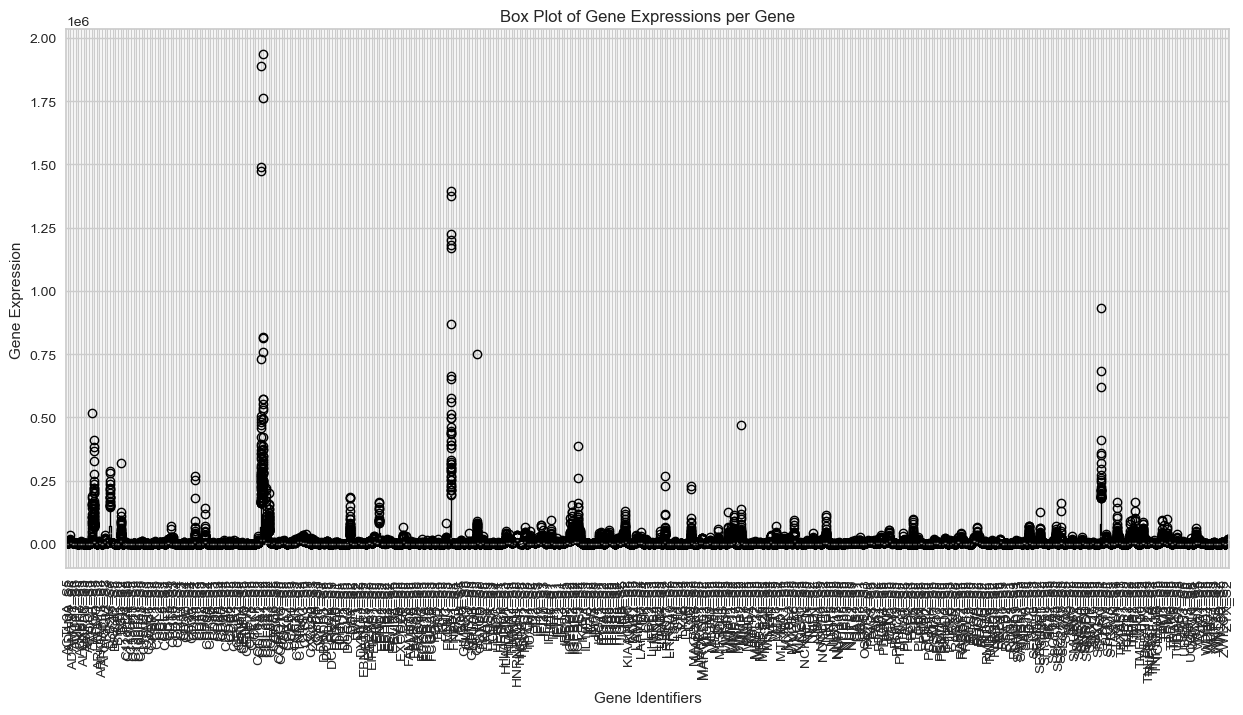

In [21]:
# Box Plot of all genes
plt.figure(figsize=(15, 7))
df.boxplot()
plt.title(f'Box Plot of Gene Expressions per Gene')
plt.xlabel('Gene Identifiers')
plt.ylabel('Gene Expression')
plt.xticks(rotation=90) #  rotates the label on the x-axis
plt.show()

The results show there are outliers which require closer examination. These can be visualised by plotting subsets of genes to identify the specific genes in question.

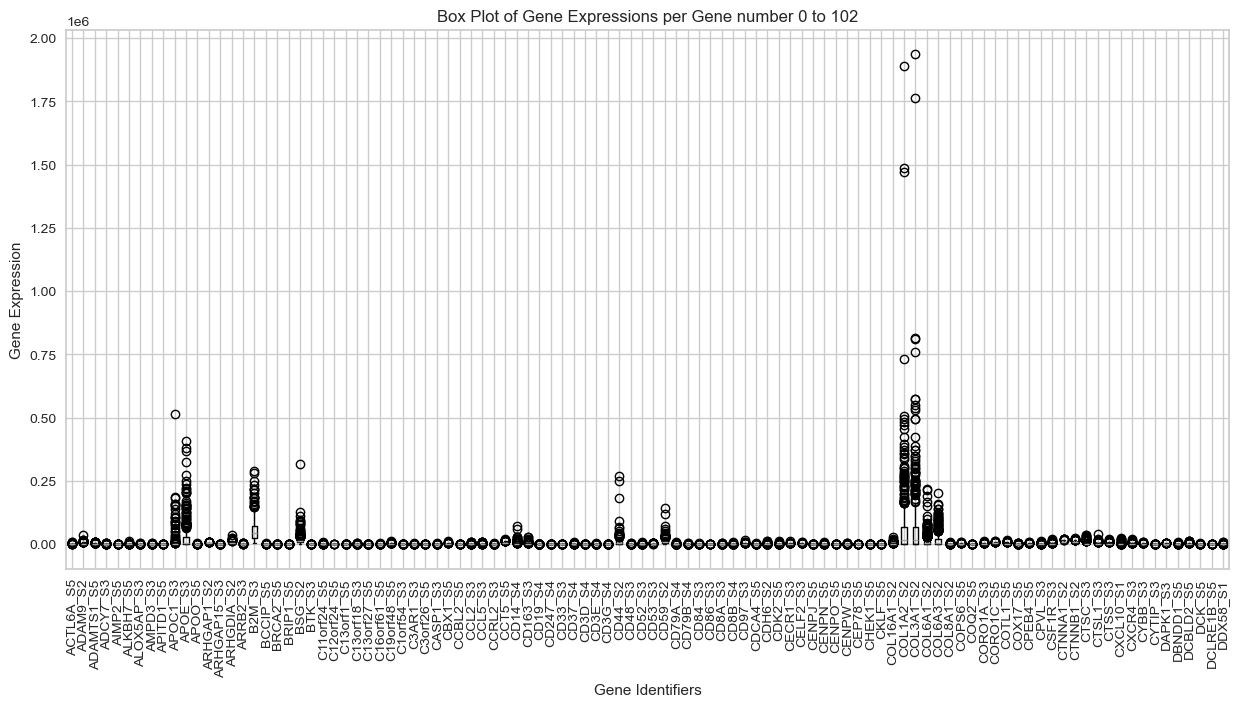

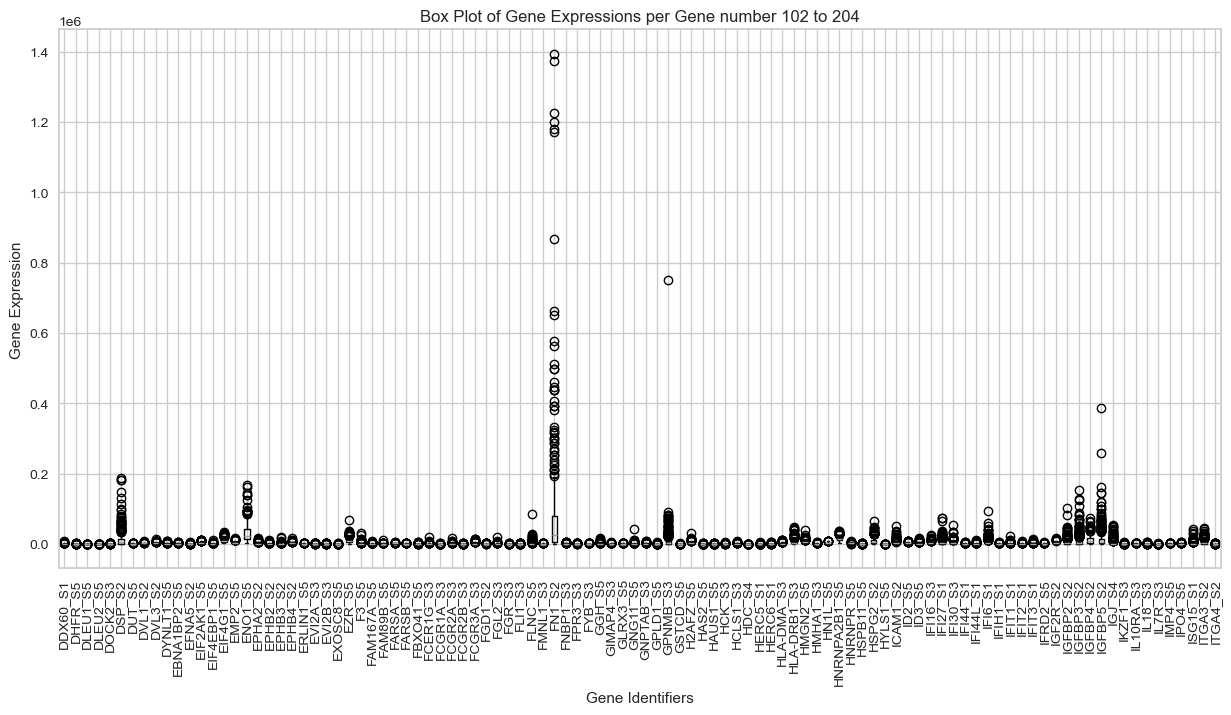

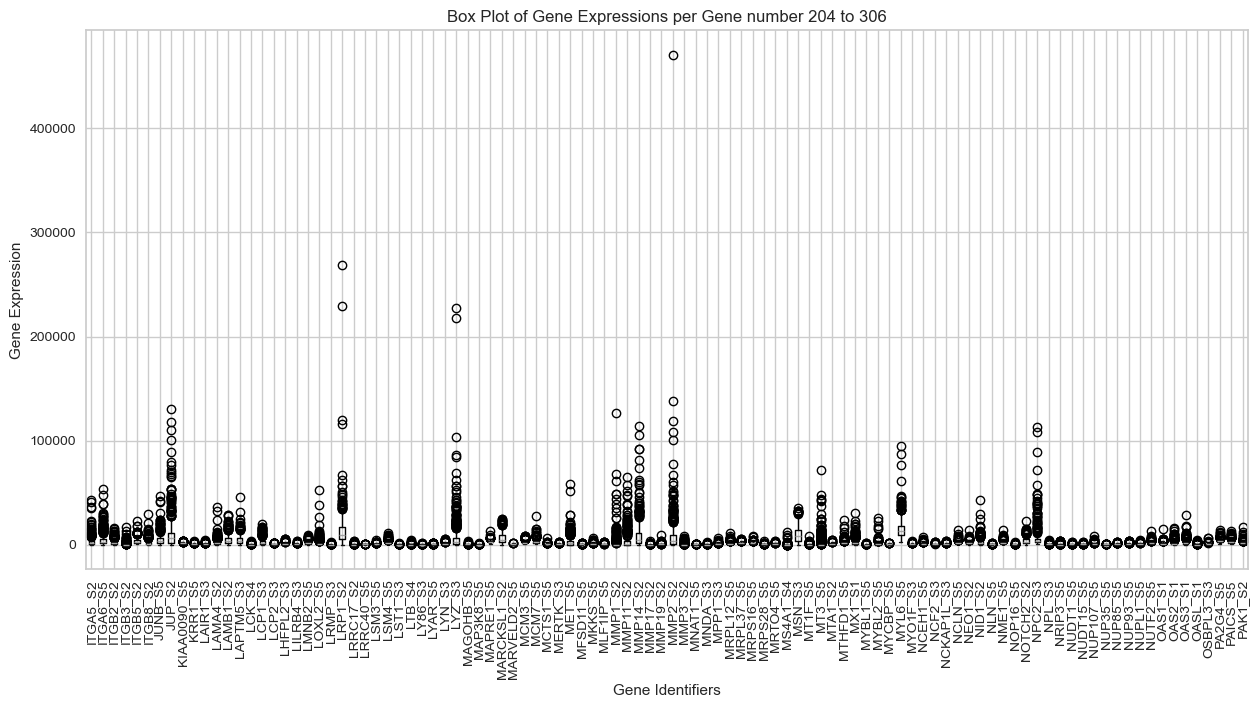

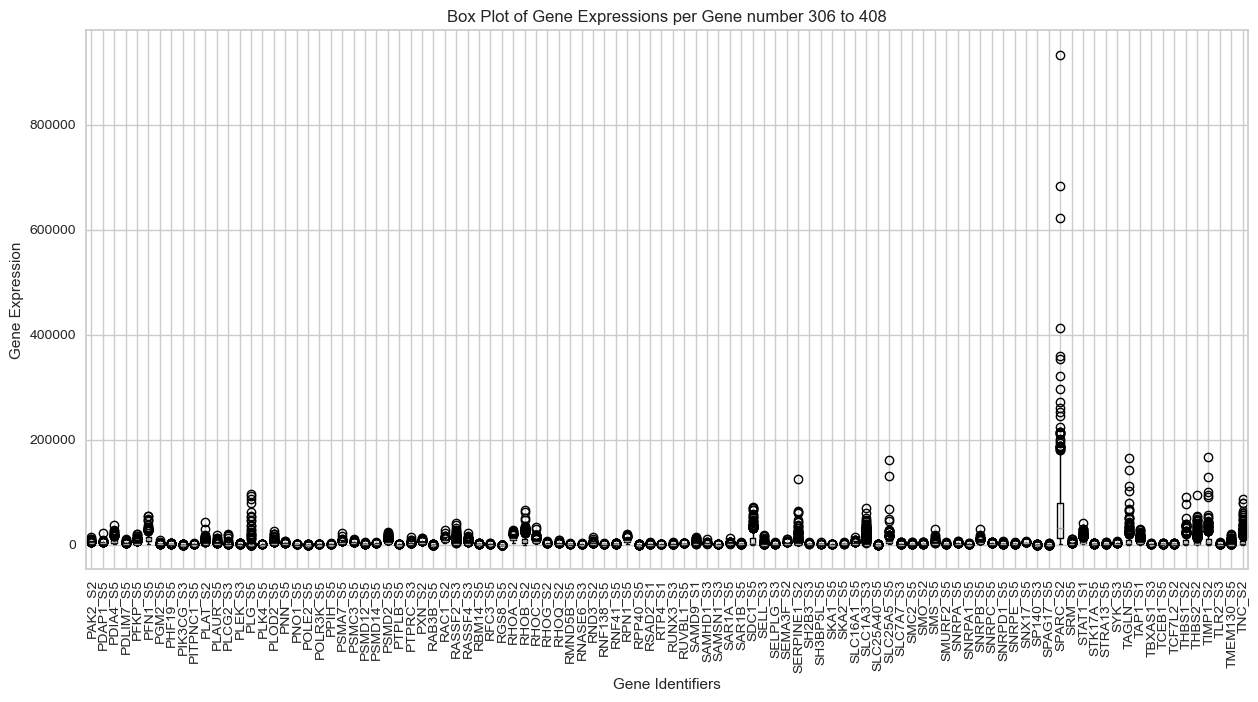

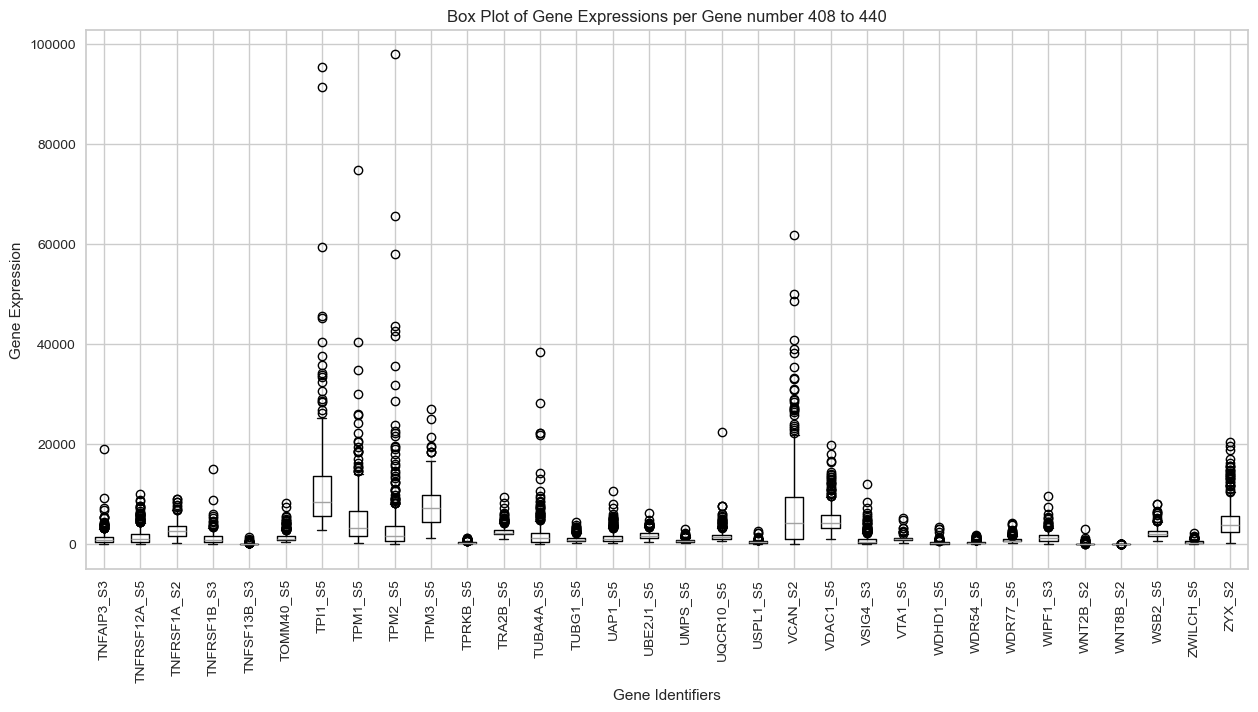

In [23]:
# Function to visualise a subset of genes
def visualise_columns(df, start, end):
    subset_columns = df.columns[start:end]
    
    # Box Plot for genes in specified range
    plt.figure(figsize=(15, 7))
    df[subset_columns].boxplot()
    plt.title(f'Box Plot of Gene Expressions per Gene number {start} to {end}')
    plt.xlabel('Gene Identifiers')
    plt.ylabel('Gene Expression')
    plt.xticks(rotation=90)
    plt.show()

# Visualise genes in batches of 102
batch_size = 102
for i in range(0, len(df.columns), batch_size):
    visualise_columns(df, i, min(i + batch_size, len(df.columns)))

From the context of the dataset, these outliers may represent important information on high gene expression which can be used to signal the presence of important biological information. Analysing these outliers could lead to important breakthroughs. Therefore, removing these will cause the loss of valuable information. 

From the first box plot visualisation, the genes COL1A2_S2 and COL3A1_S2 contain extreme outliers. These genes may be signifcant for diagnosing biologival conditions. 

Gene FN1_S2 contains an outlier of lower magnitude than the previous mentioned, this still could be a significant gene. 

MMP2_S2 in the final boxplot shows another outlier of even lower magnitude than the three previously mentioned genes indicating it may hold significant information although less so than the other aforementioned genes.

The heatmap visualises missing values in the dataset, the colours indicate whether a value is present or missing. The yellow dots represent missing values allowing for patterns to be discovered. 

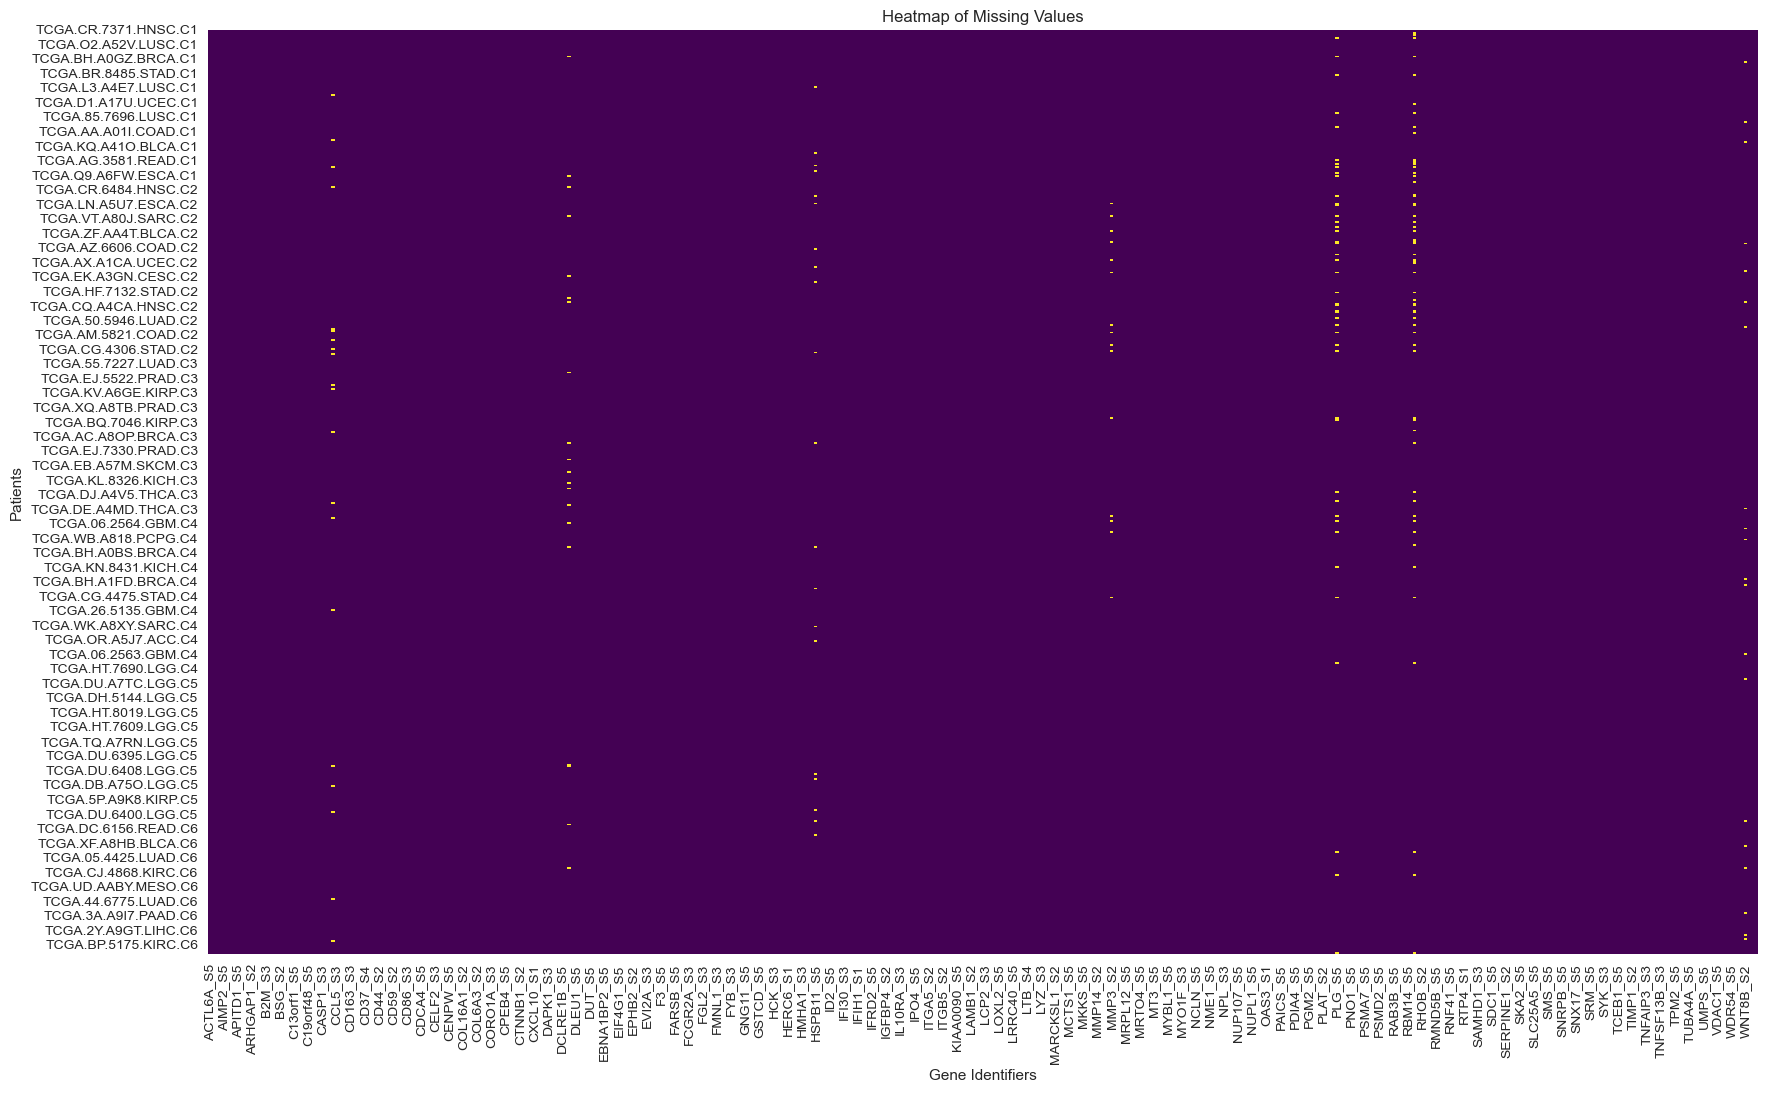

In [26]:
# heatmap of the data coded as boolean for missingness
plt.figure(figsize=(20, 12))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Missing Values')
plt.ylabel('Patients')
plt.xlabel('Gene Identifiers')
plt.show()

The results indicate that some genes are missing multiple values due to the vertical lines along the gene, the missingness is MNAR as there is a pattern of vertical lines. This suggests the tests for these genes have errors, some test are not performed based on the patient, or some genes are not detectable in certain patients.

For closer examination identifying the genes with missing values can provide insights into the extent of the missingness.

In [29]:
missing_features = df.columns[df.isnull().any()]
print(f"The gene identifiers with missing values are:")

for missing_feature in missing_features:
    print(f"-> {missing_feature}")

The gene identifiers with missing values are:
-> CCL2_S3
-> DDX60_S1
-> HSPB11_S5
-> MMP3_S2
-> PLG_S5
-> RGS8_S5
-> WNT8B_S2


Seven genes contain missing values. This allows further examination of the impact of this missingness to the dataset and whether imputation is needed. 

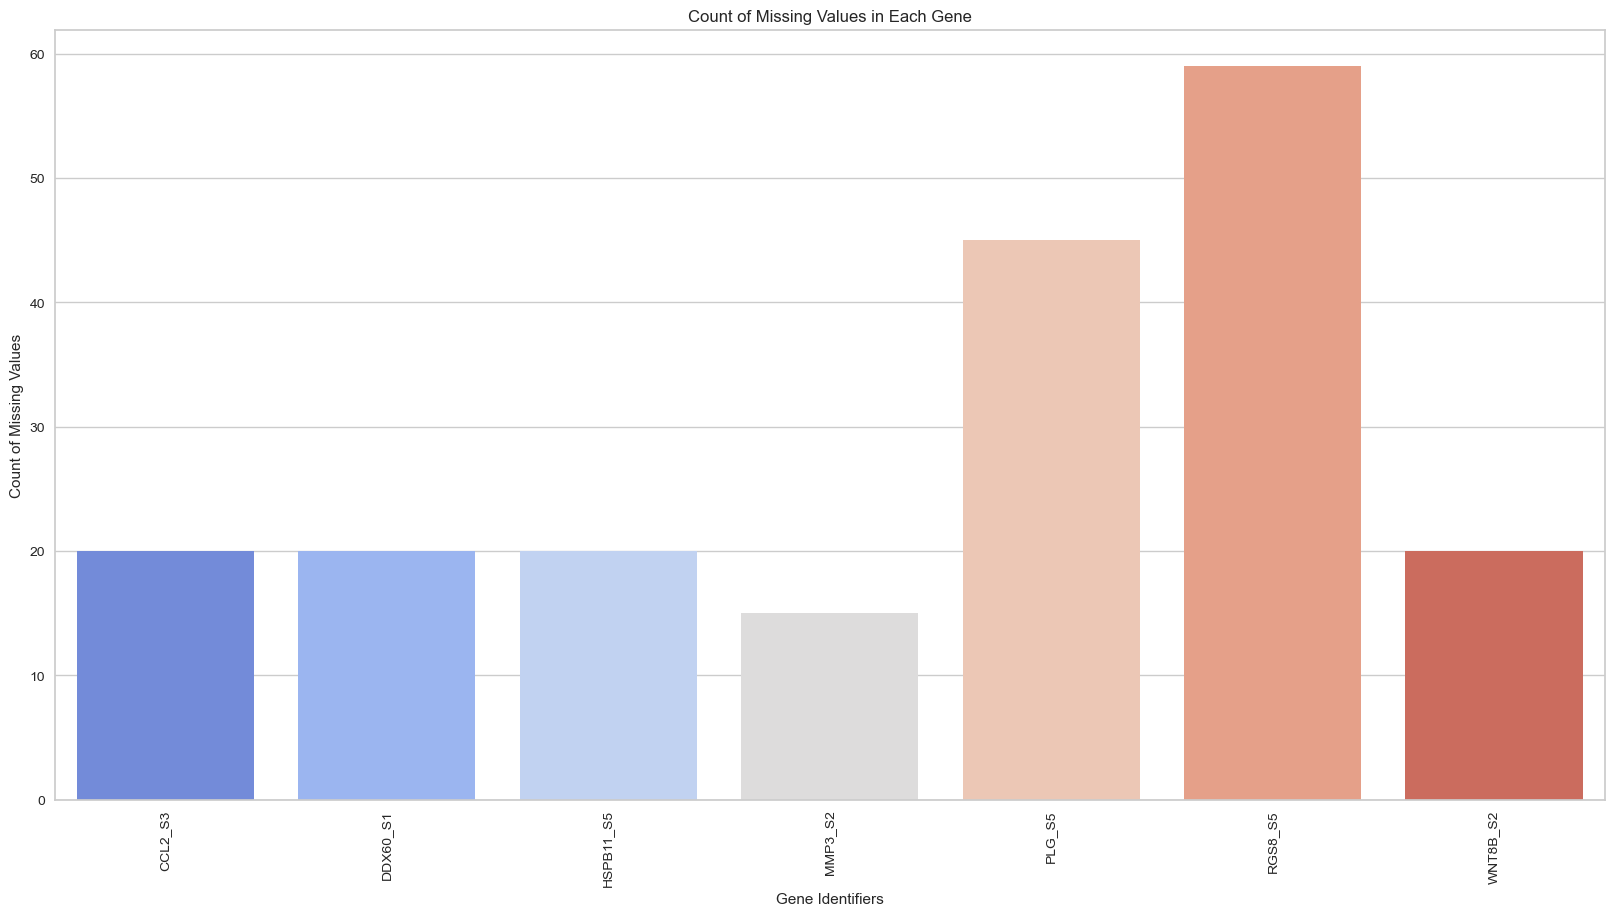

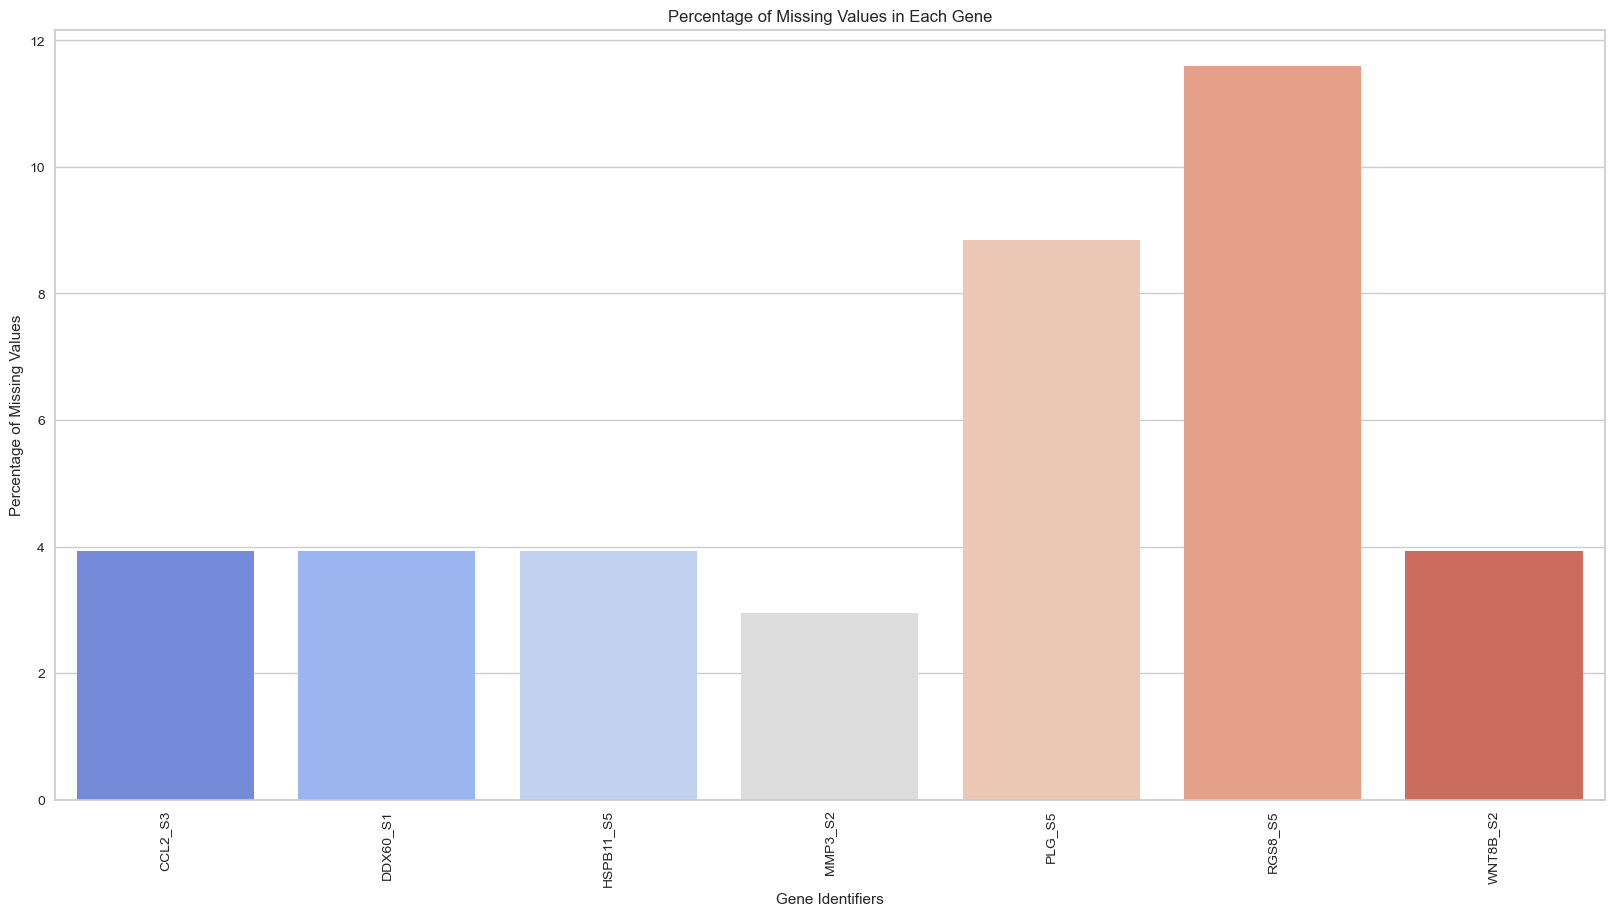

In [31]:
# Calculation of missingness measures
missing_percentages = df[missing_features].isna().mean() * 100
missing_counts = df[missing_features].isna().sum()

# Bar plot of missing counts
plt.figure(figsize=(20, 10))
sns.barplot(x=missing_counts.index, y=missing_counts, palette='coolwarm', hue=missing_counts.index, legend=False)
plt.xlabel('Gene Identifiers')
plt.ylabel('Count of Missing Values')
plt.title('Count of Missing Values in Each Gene')
plt.xticks(rotation=90)
plt.show()

# Bar plot of missing percentages
plt.figure(figsize=(20, 10))
sns.barplot(x=missing_percentages.index, y=missing_percentages, palette='coolwarm', hue=missing_counts.index, legend=False)
plt.xlabel('Gene Identifiers')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values in Each Gene')
plt.xticks(rotation=90)
plt.show()

The missing percentage is high (>5%) for two genes, simple imputation techniques like mean, median, or mode imputation are not appropriate. To ensure maximum accuracy multivarite imputation is necessary. The other genes are just below 4% therefore multivariate imputation is still appropriate for these genes.

Multivariate imputation helps fill the missing values by leveraging information from other genes and samples to produce more accurate estimates of missing values than simple mean and median imputation.

In [34]:
# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=20, random_state=0)

# Fit the imputer and transform the dataset
df_imputed = imputer.fit_transform(df)

# Convert the result back to a pandas DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns, index=df.index)

Correalation analysis is used to evaluate the strength and direction of the relationship between two or more variables. This helps to assess whether the relationships between features have changed significantly due to the imputed values.

In [36]:
# Correlation matrix before imputation (drops missing values)
corr_original = df.corr()

# Correlation matrix after imputation
corr_imputed = df_imputed.corr()

corr_diff = (corr_imputed - corr_original).abs()

# Set a threshold for significant change (e.g., 0.3)
threshold = 0.3
corr_diff_significant_changes = corr_diff[corr_diff > threshold]
num_corr_diff_above_threshold = corr_diff_significant_changes.notna().sum().sum()

print(f"The number of significant changes is {num_corr_diff_above_threshold}.")

The number of significant changes is 0.


The results of the correalation analysis show that the process of imputing missing values has not resulted in noticeable alterations in the relationships between genes. The imputation was successful in preserving the original relationships. The imputation has not disrupted the natural gene-gene relationships allowing for clustering to be applied effectively.

Scaling ensures that features with larger ranges do not dominate the analysis, enabling fair contributions from all features. Clustering techniques like Kmeans rely on distance metrics like Euclidean or Manhattan distance, which are sensitive to feature magnitudes. Without scaling, features with larger values can disproportionately influence the results, potentially leading to biased clustering or poor model performance.

In [39]:
# Initialize the min max scaler
scaler = MinMaxScaler()

# Apply on imputed dataframe
df_min_max = scaler.fit_transform(df_imputed)

# Convert the result back to a pandas DataFrame
df_min_max = pd.DataFrame(df_min_max, columns=df.columns, index=df.index)

In [40]:
# Initialize the standard scaler
scaler = StandardScaler()

# Apply on imputed dataframe
df_zscore = scaler.fit_transform(df_imputed)

# Convert the result back to a pandas DataFrame
df_zscore = pd.DataFrame(df_zscore, columns=df.columns, index=df.index)
df_zscore = df_zscore - df_zscore.min().min()

In [41]:
absolute_min = df_imputed.min().min()

# Apply on imputed dataframe
df_log_transform = np.log1p(df_imputed - absolute_min)

# Convert the result back to a pandas DataFrame
df_log_transform = pd.DataFrame(df_log_transform, columns=df.columns, index=df.index)

In [42]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the data
robust_scaled = scaler.fit_transform(df_imputed)

# Convert back to a DataFrame for easier visualization
df_robust_scaled = pd.DataFrame(robust_scaled, columns=df.columns, index=df.index)

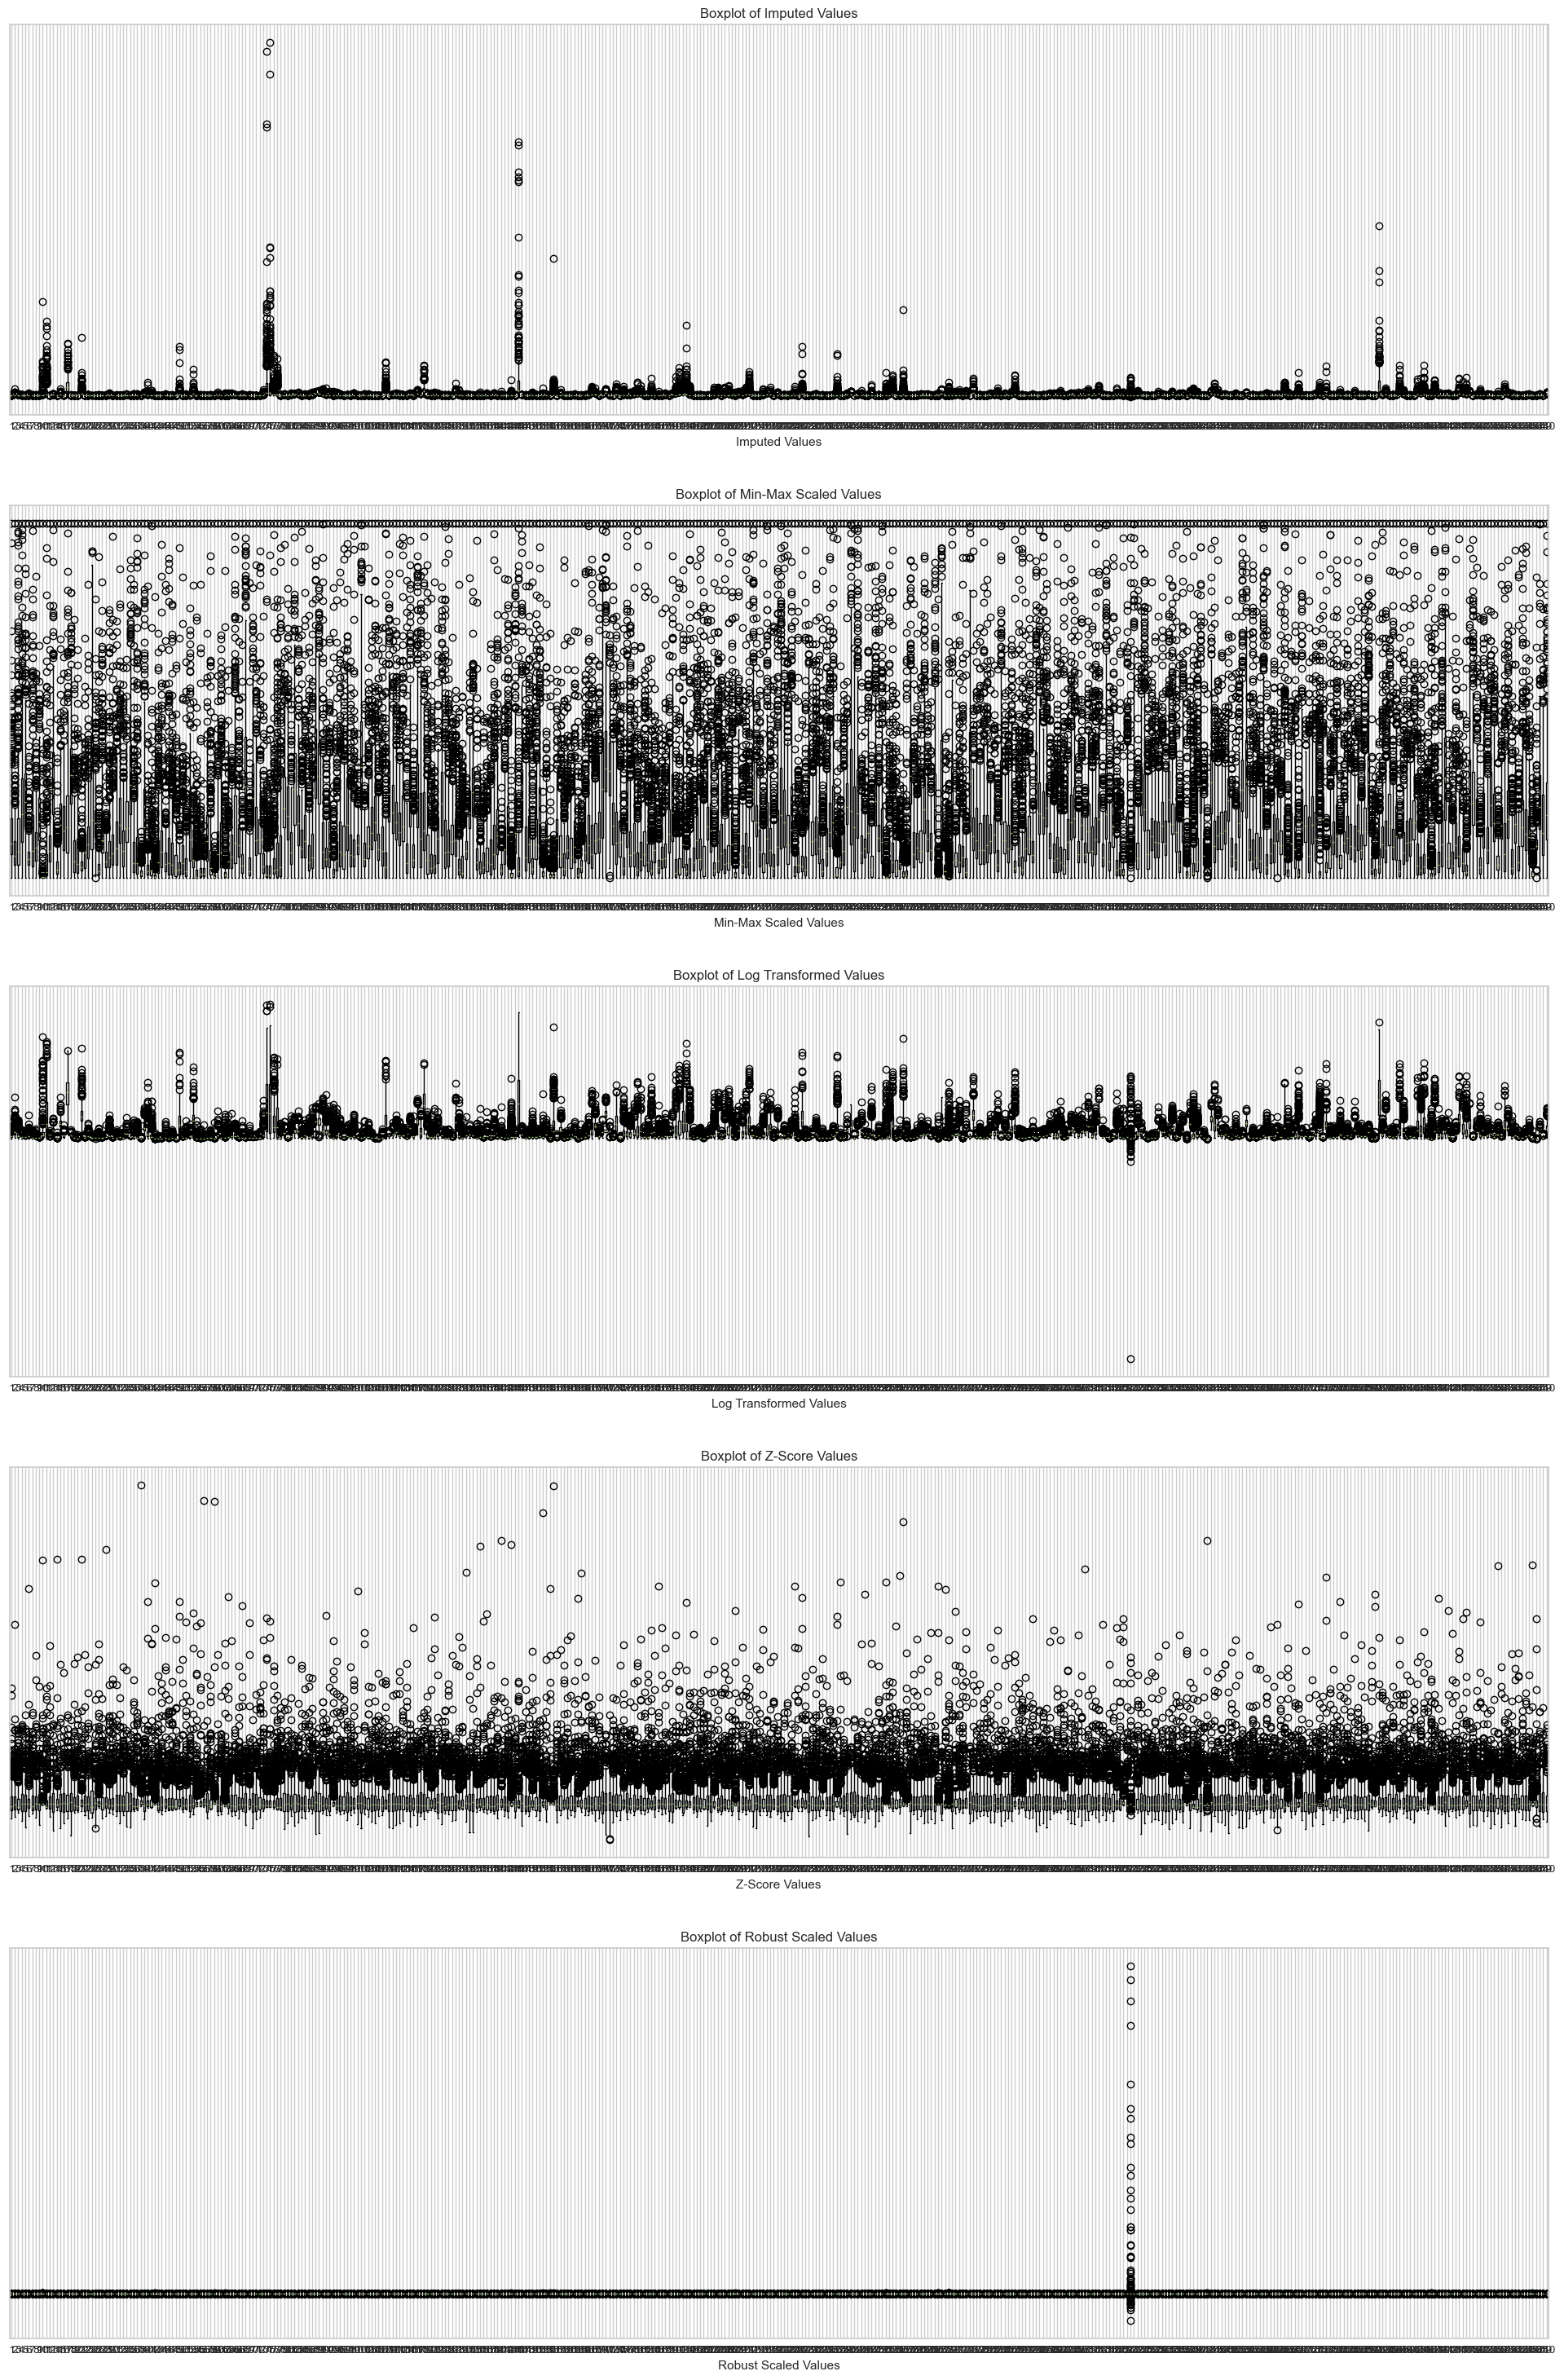

In [43]:
# Make boxplots of the imputed data
fig, axes = plt.subplots(5, 1, figsize=(20, 30))  # Increase height to 30
axes = axes.ravel()

# Boxplot for imputed values
axes[0].boxplot(df_imputed)
axes[0].set_yticks([])  # Remove y-ticks
axes[0].set_yticklabels([])  # Remove y-tick labels
axes[0].set_xlabel('Imputed Values')
axes[0].set_title('Boxplot of Imputed Values')

# Boxplot for min-max scaled values
axes[1].boxplot(df_min_max)
axes[1].set_yticks([])  # Remove y-ticks
axes[1].set_yticklabels([])  # Remove y-tick labels
axes[1].set_xlabel('Min-Max Scaled Values')
axes[1].set_title('Boxplot of Min-Max Scaled Values')

# Boxplot for log-transformed values
axes[2].boxplot(df_log_transform)
axes[2].set_yticks([])  # Remove y-ticks
axes[2].set_yticklabels([])  # Remove y-tick labels
axes[2].set_xlabel('Log Transformed Values')
axes[2].set_title('Boxplot of Log Transformed Values')

# Boxplot for z-score values
axes[3].boxplot(df_zscore)
axes[3].set_yticks([])  # Remove y-ticks
axes[3].set_yticklabels([])  # Remove y-tick labels
axes[3].set_xlabel('Z-Score Values')
axes[3].set_title('Boxplot of Z-Score Values')

# Boxplot for robust scaled values
axes[4].boxplot(df_robust_scaled)
axes[4].set_yticks([])  # Remove y-ticks
axes[4].set_yticklabels([])  # Remove y-tick labels
axes[4].set_xlabel('Robust Scaled Values')
axes[4].set_title('Boxplot of Robust Scaled Values')

plt.tight_layout(pad=3.0)  # Increase padding between plots
plt.show()

From the plotted box plots, the Standard Scaler preserved the shape of the data while reducing the range of expression values. The similar shape indicates that the distribution of the data has been preserved. Z-score standardizes the data without altering its fundamental structure. When Z-score scaling is applied, the variability within the data is retained relative to the original data. These reasons make it an appropriate choice for scaling the data before clustering.

**Explanation for chosen algorithm(s):** 

Kmeans is straightforward to implement and scales well with the dataset size, making it suitable for exploratory analysis. The TCGA dataset largely comprises continuous variables, which align well with K-Means, as it minimizes within-cluster variance using Euclidean distance. K-Means is computationally efficient compared to more complex algorithms, making it suitable for single-laptop execution. K-Means is conceptually straightforward and easy to implement using Python libraries like scikit-learn.

Trying agglomerative clustering, is valuable as it captures hierarchical relationships and requires no predefined K. This shows how naturally the dataset wants to be clustered and can be displayed in a dendrogram. 

Applying spectral clustering, allows the capture of non-linear relationships to compare a different approach to clustering the dataset. This explores whether accuracy can be improved through a different approach. 

Gaussian mixture models  uses a probabilistic framework, which is alternatoive approach from the other methods. This approach can handle nouse and ambiguous cluster boundaries, allowing for these factors to be identified as the problem areas if the accuracy of this approach is better than the other clustering techniques mentioned. 

Each algorithm uses a different approach to clustering (hierarchical, graph-based, and probabilistic), capturing distinct aspects of the dataset’s structure. Each algorithm brings unique strengths to the table, allowing for exploration of the best algorithm for this specific situation.

**Justification of the selected approach:**

Starting with K-Means provides a straightforward baseline to understand the structure of the data. This step allows evaluation of the raw data’s separability and gives insight into any preprocessing needs. 

The next step applying NMF to the dataset is needed as K-Means often struggles with high-dimensional data. By reducing the number of features with NMF, the algorithm can better distinguish clusters. NMF is applicable as it identifies latent features that may represent biologically relevant patterns. 

Exploring other clustering techniques, such as Spectral Clustering, Agglomerative Clustering, or Gaussian Mixture Models, allows comparison of performance and validates the robustness of the results. Using multiple techniques ensures the results are not an artifact of a single method. 

Finally, applying consensus clustering in noisy or high-dimensional datasets like TCGA is a reliable approach. K-Means results can vary due to random initialization of centroids. Consensus clustering mitigates this by averaging results over multiple runs or integrating results from different clustering methods. By combining clustering results, consensus clustering provides more reliable and reproducible groupings, which are critical for downstream biological interpretation.

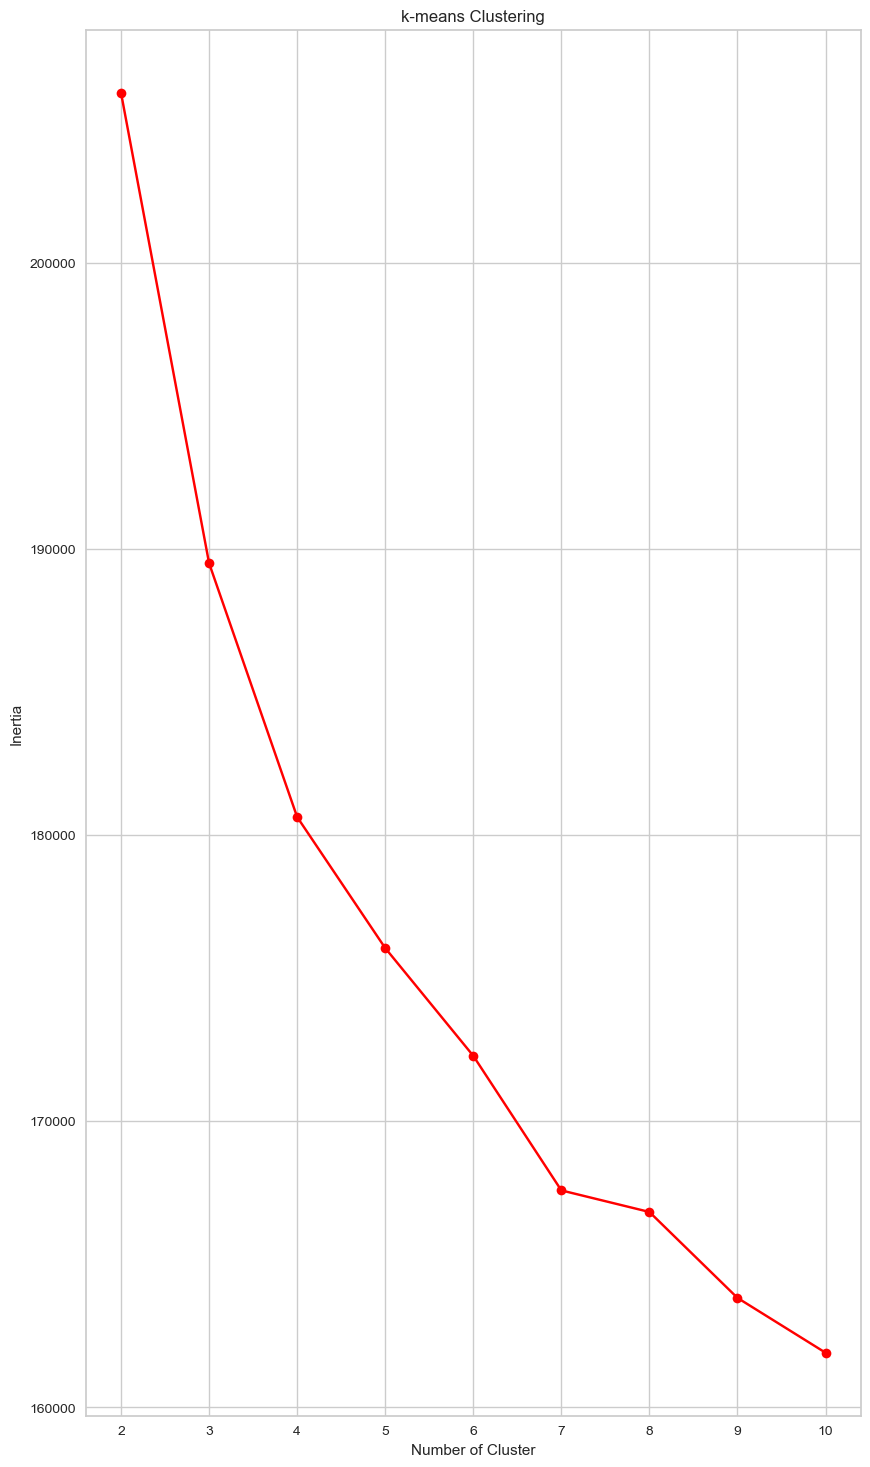

In [46]:
kmeans_model = KMeans(random_state=42, init='k-means++', n_init='auto', algorithm='lloyd')

def calculate_inertia(model, df):
# Define the range of clusters to try
    range_clusters = range(2, 11)
    
    # Store inertia for cluster analysis
    inertia = []
    
    # Loop over different numbers of clusters and compute KMeans
    for n_clusters in range_clusters:
        model.set_params(n_clusters=n_clusters)
        model.fit(df)
        
        inertia.append(model.inertia_)
    
    # visulaise inertia over range of k clusters
    plt.figure(figsize=(10,18))
    plt.plot(range_clusters, inertia, marker = 'o', linestyle = '-', color='red')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Inertia')
    plt.title('k-means Clustering')
    plt.show()

calculate_inertia(kmeans_model, df_zscore)

The inertia plot shows an elbow starting at 4 clusters and ending at 7. As the number of clusters is known we will pick 6 from within this range as the number of clusters to consider.

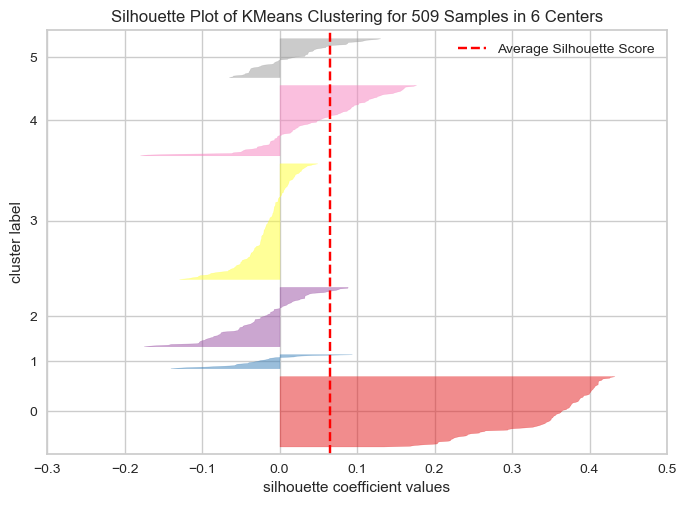

In [48]:
kmeans_model = KMeans(n_clusters=6, random_state=42, init='k-means++', n_init='auto', algorithm='lloyd')
    
def silhouette_plot(model, df):
    visualizer = SilhouetteVisualizer(model)
    visualizer.fit(df) # Fit the data to the visualizer
    visualizer.poof() # Draw/show/poof the data
    
silhouette_plot(kmeans_model, df_zscore)

The silhouette analysis shows a poor average silhouette score. The bars are short suggesting the clusters are not seperated effectively. The bars contain negative values showing points are closer to their neighbouring cluster than their assigned cluster. This suggests improvements are needed.

In [50]:
# Define a mapping dictionary for categorical values to numeric
category_mapping = {'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 5, 'C6': 6}

# Replace categorical values with numerical equivalents
target_values = target_values.T
target_values['Subgroup'] = target_values['Subgroup'].map(category_mapping)

**Subgroup extraction** allows for the measuring of clustering accuracy through ARI, NMI and, Confusion matrices as there are ground truth labels to compare with predicted labels from the algorithm. Using the Adjusted Rand Index, allows for measuring of the similarity between the predicted clusters and the true labels, accounting for chance. Normalised mutual information quantifies the amount of information shared between the predicted clusters and the true subgroups allowing for assessment of clustering performance. The confusion matrix will allow the accuracy of the clustering approach to identify the correct group showing improvement in prediction of model after alterations of the approach.

In [52]:
def map_predicted_labels(predicted_labels):
    # Create a confusion matrix
    contingency_matrix  = confusion_matrix(true_labels, predicted_labels)
    
    # Solve the permutation mapping using the Hungarian algorithm
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix ) # Maximize accuracy (negative for maximization)
    
    # Create a mapping from predicted to true labels
    mapping = dict(zip(col_ind, row_ind))
    
    # Map the predicted labels to the ground-truth labels
    mapped_predicted_labels = np.array([mapping[label] for label in predicted_labels])
    return mapped_predicted_labels

In [53]:
true_labels = target_values['Subgroup']
mapped_predicted_labels = map_predicted_labels(kmeans_model.labels_)

accuracy = accuracy_score(true_labels, mapped_predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.48919449901768175


The accuracy is 48.9% on the first attempt. This is poor and suggests a different approach is needed, therefore I will apply NMF to the Zscore dataset. NMF before K-Means enables the algorithm to operate in a lower-dimensional, less noisy, and biologically meaningful space, enhancing clustering quality and interpretability. 

In [55]:
ari = adjusted_rand_score(true_labels, mapped_predicted_labels)
nmi = normalized_mutual_info_score(true_labels, mapped_predicted_labels)

print(f"ARI: {ari}")
print(f"NMI: {nmi}")

ARI: 0.2567610314080169
NMI: 0.36389305019262075


The NMI score is relatively low, indicating that the clustering captures only a small fraction of the true relationships or patterns in the data. ARI being lower than NMI highlights that the clustering might not align well in terms of pairwise relationships between data points, suggesting significant mismatches or noise.

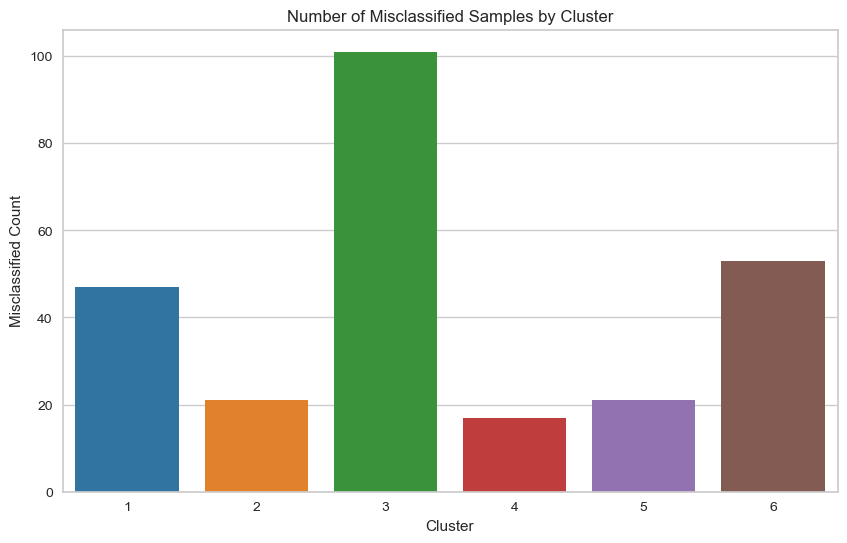

In [57]:
# Identify misclassified samples
misclassified = (mapped_predicted_labels != true_labels)

# Count misclassified samples by predicted cluster
cluster_names, misclassified_counts = np.unique(mapped_predicted_labels[misclassified], return_counts=True)

# Create a DataFrame for visualization
misclassified_df = pd.DataFrame({
    "Cluster": cluster_names,
    "Misclassified Count": misclassified_counts
})

plt.figure(figsize=(10, 6))
sns.barplot(x="Cluster", y="Misclassified Count", data=misclassified_df, palette="tab10")
plt.title("Number of Misclassified Samples by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Misclassified Count")
plt.show()

Massive misclassification in the third cluster suggests poor separation, high variability, or overlaps with other clusters, potentially due to suboptimal features or K-Means' limitations. This can be addressed by refining features, and considering alternative clustering methods like Gaussian Mixture Models.

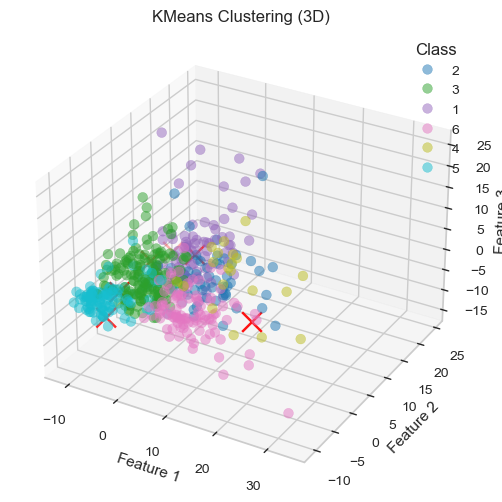

In [59]:
def visualise_3d_plot(df, labels, centroids):
    # Reduce data to 3 dimensions for visualization
    pca = PCA(n_components=3)
    reduced_df = pca.fit_transform(df)
    centroids_3d = pca.fit_transform(centroids)
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    labels_c = pd.factorize(mapped_predicted_labels)[0]
    scatter = ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=labels_c, cmap='tab10', s=50, alpha=0.5)
    ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], c='red', marker='x', s=200, label='Centroids')
    
    handles, _ = scatter.legend_elements(prop="colors")
    legend_labels = pd.unique(mapped_predicted_labels)
    ax.legend(handles, legend_labels, title="Class")
    
    ax.set_title("KMeans Clustering (3D)")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Feature 3")
    plt.show()

centroids = kmeans_model.cluster_centers_
visualise_3d_plot(df_zscore, mapped_predicted_labels, centroids)

The PCA visualisation shows overlap of all clusters, and high variability within the clusters. This suggests NMF could be utilised as it emphasises meaningful structures, reduces noise, and handles sparsity effectively. This preprocessing step improves cluster quality, making distinctions clearer for algorithms like k-means.

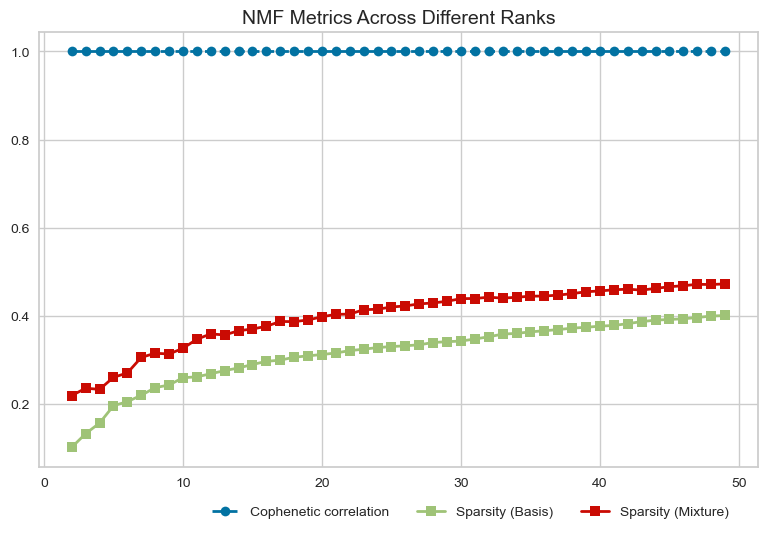

In [98]:
V = np.array(df_zscore.T)

# Rank estimation parameters
rank_num = range(2, 50)  # Initial rank range
lsnmf = nimfa.Lsnmf(V, seed='nndsvd', max_iter=100, alpha_w=0, alpha_h=0)

# Estimate rank
summary = lsnmf.estimate_rank(rank_range=rank_num, idx=0, what='all')

#The plot will show the cophenetic correlation and the amount of sparseness in the dataset
cophenetic = [summary[rank]['cophenetic'] for rank in rank_num]
sparseness = [summary[rank]['sparseness'] for rank in rank_num]
sparseness_w, sparseness_h = zip(*sparseness)

# Visualise the results to pick rank
plt.title("NMF Metrics Across Different Ranks", fontsize=14)

plt.plot(rank_num, cophenetic, 'o--', label='Cophenetic correlation', linewidth=2)
plt.plot(rank_num, sparseness_w, 's-', label='Sparsity (Basis)', linewidth=2)
plt.plot(rank_num, sparseness_h, 's-', label='Sparsity (Mixture)', linewidth=2)

plt.legend(loc='upper center', bbox_to_anchor=(0.6, -0.06), ncol=3, numpoints=1)

plt.grid(True)
plt.tight_layout()
plt.show()

The cophenetic coefficient of 1 indicate more stable factorisations. Higher sparsity means data points are represented by fewer components, which may enhance interpretability in clustering. The elbow on the sparsity lines indicates the rank should be: 20. 

In [101]:
#Performing nmf with the best rank
nmf_model = NMF(n_components=20, init='nndsvd', max_iter=5000)
W_matrix = nmf_model.fit_transform(df_zscore.T)
H_matrix = nmf_model.components_

df_H_matrix = pd.DataFrame(data=H_matrix, columns = df_zscore.index)
df_H_matrix = df_H_matrix.T

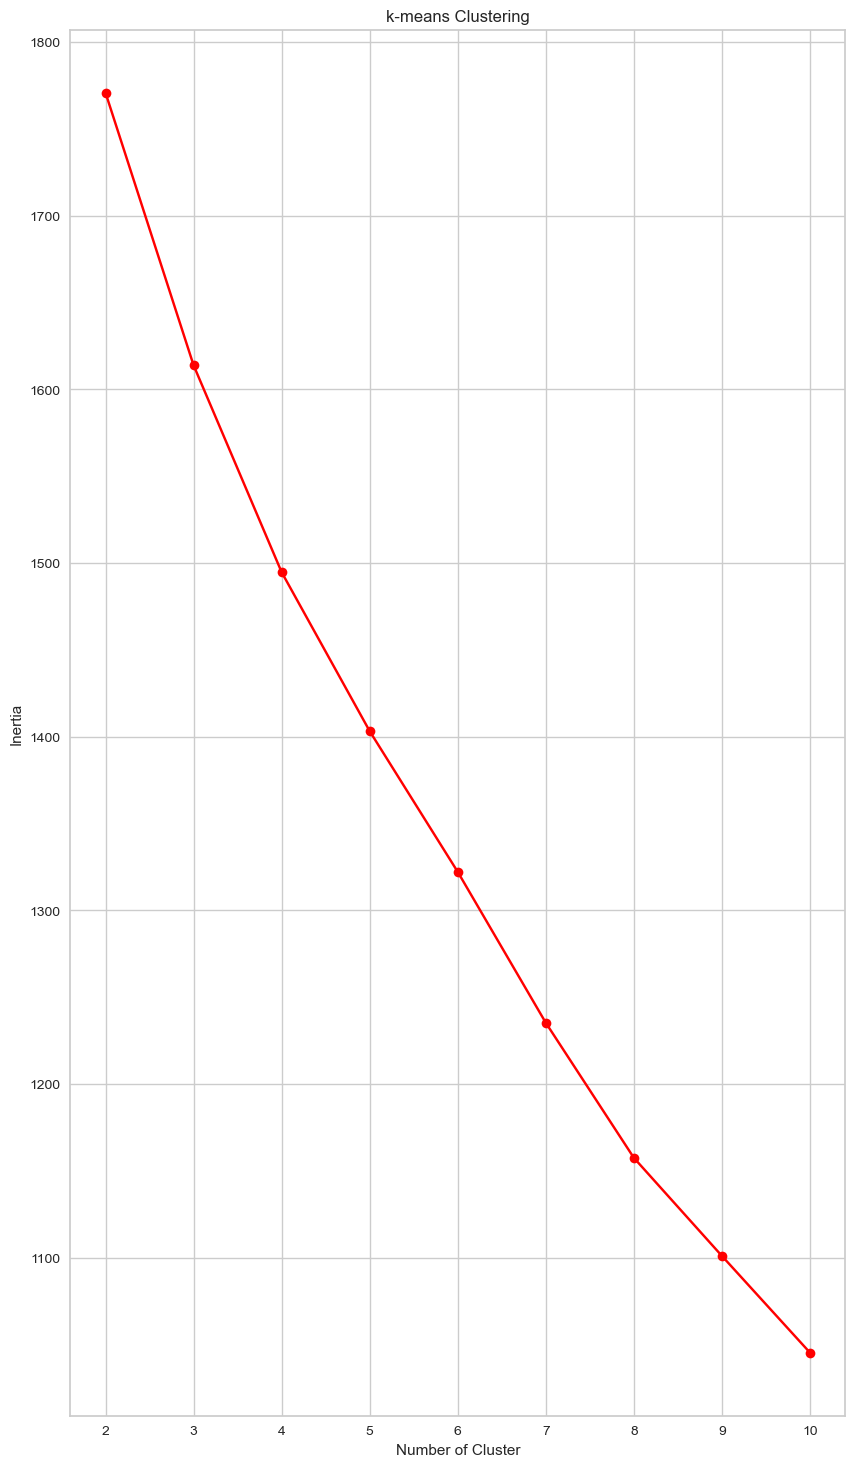

In [102]:
kmeans_model = KMeans(random_state=42, init='k-means++', n_init=50, algorithm='lloyd')
calculate_inertia(kmeans_model, df_H_matrix)

There is no clear elbow, this suggests the cliustering will not work well on the 6 clusters in the dataset. The graph indicates more clusters would create a better result. However, from the subgroups assigned to each patient 6 clusters is the correct number of clusters.

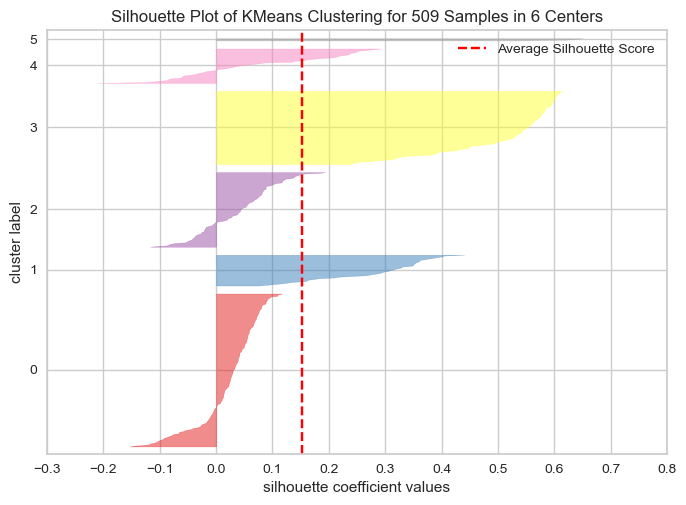

In [104]:
kmeans_model = KMeans(n_clusters=6, random_state=42, init='k-means++', n_init=50, algorithm='lloyd')
silhouette_plot(kmeans_model, df_H_matrix)

The silhouette analysis shows a poor average silhouette score and no improvement on length and width of the silhouette plots. This suggests further improvements are needed.

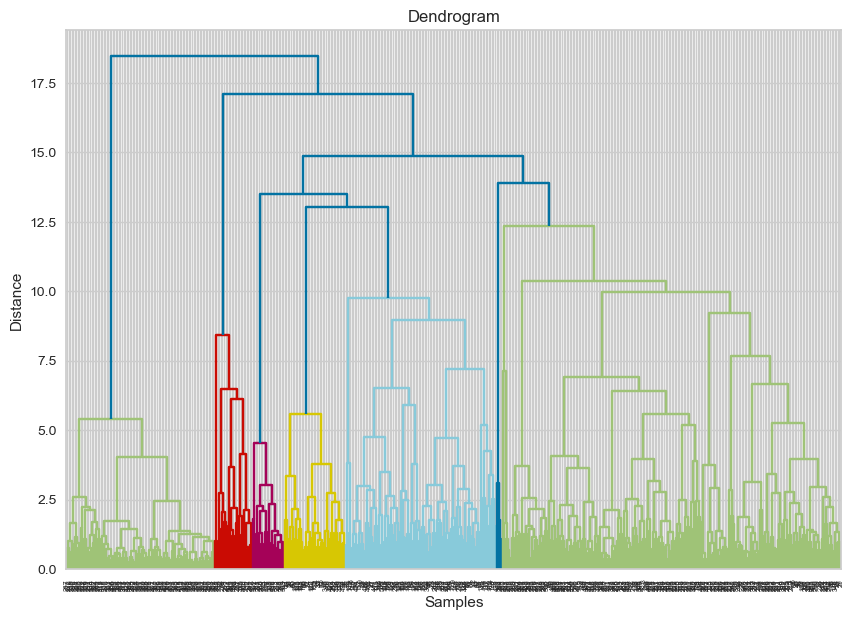

In [107]:
linkage_matrix = linkage(df_H_matrix, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=np.arange(len(df_H_matrix)))
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [108]:
kmeans_model = KMeans(n_clusters=6, random_state=42, init='k-means++', n_init=50, algorithm='lloyd')
kmeans_model.fit(df_H_matrix)

KMeans(n_clusters=6, n_init=50, random_state=42)

In [109]:
true_labels = target_values['Subgroup']
mapped_predicted_labels = map_predicted_labels(kmeans_model.labels_)

accuracy = accuracy_score(true_labels, mapped_predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.5127701375245579


In [110]:
ari = adjusted_rand_score(true_labels, mapped_predicted_labels)
nmi = normalized_mutual_info_score(true_labels, mapped_predicted_labels)

print(f"ARI: {ari}")
print(f"NMI: {nmi}")

ARI: 0.26715127318201454
NMI: 0.38681151090448107


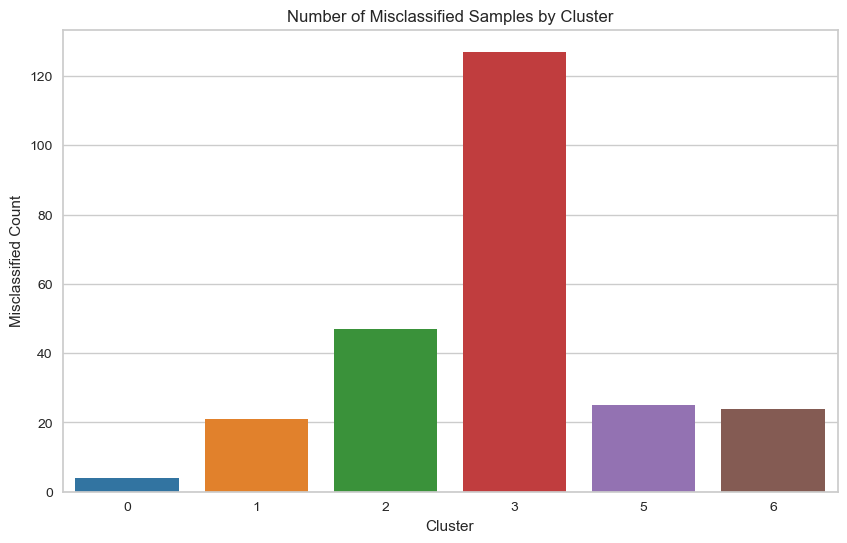

In [111]:
# Identify misclassified samples
misclassified = (mapped_predicted_labels != true_labels)

# Count misclassified samples by predicted cluster
cluster_names, misclassified_counts = np.unique(mapped_predicted_labels[misclassified], return_counts=True)

# Create a DataFrame for visualization
misclassified_df = pd.DataFrame({
    "Cluster": cluster_names,
    "Misclassified Count": misclassified_counts
})

plt.figure(figsize=(10, 6))
sns.barplot(x="Cluster", y="Misclassified Count", data=misclassified_df, palette="tab10")
plt.title("Number of Misclassified Samples by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Misclassified Count")
plt.show()

The misclassified count is still mainly cluster 3. Showing this cluster is inaccurate over both algorithms.

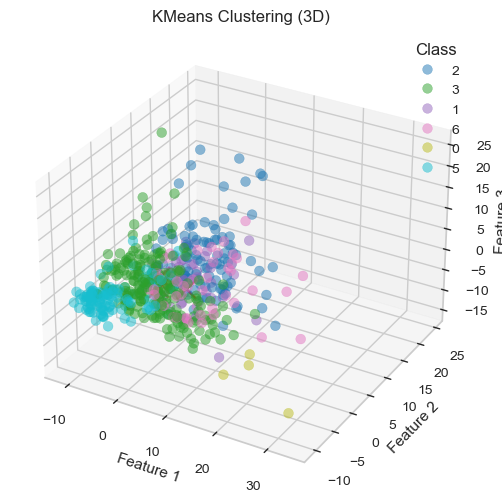

In [113]:
centroids = kmeans_model.cluster_centers_
visualise_3d_plot(df_zscore, mapped_predicted_labels, centroids)

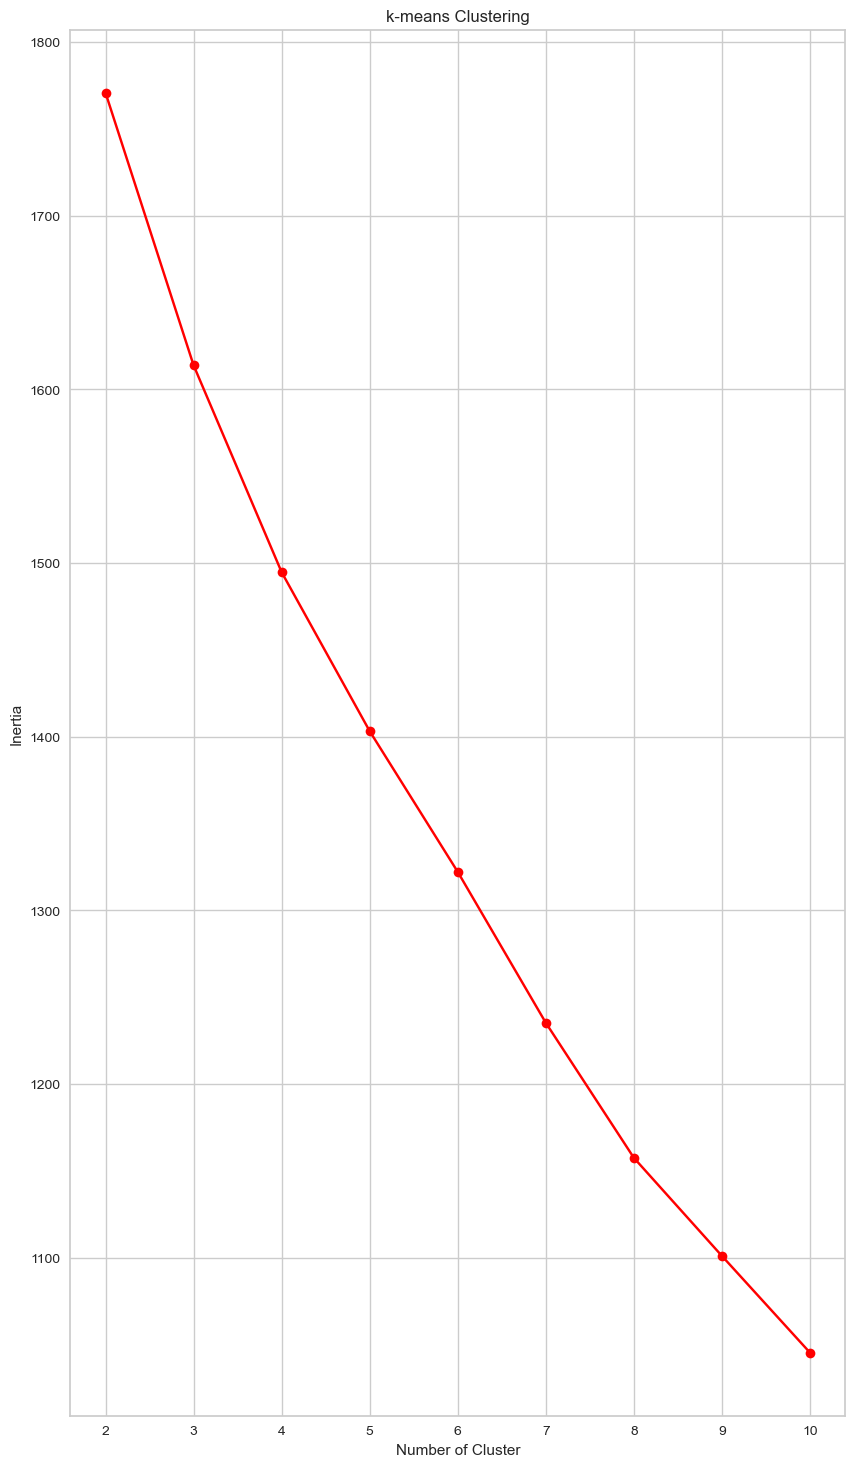

In [114]:
kmeans_model = KMeans(random_state=42, init='k-means++', n_init=50, algorithm='elkan')
calculate_inertia(kmeans_model, df_H_matrix)

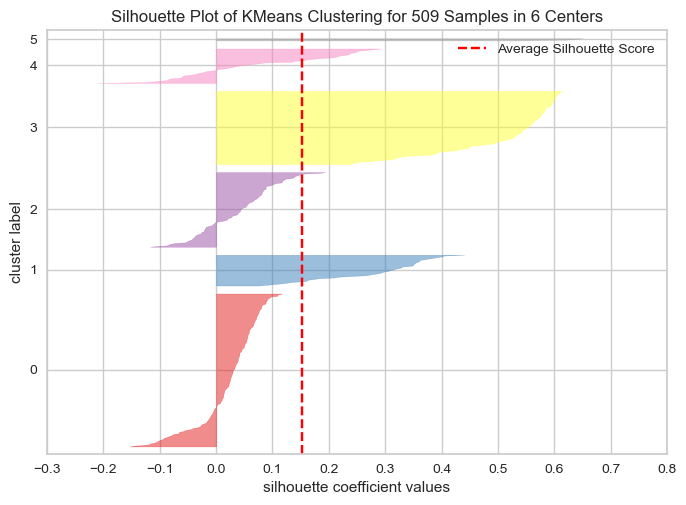

In [115]:
kmeans_model = KMeans(n_clusters=6, init='k-means++', random_state=42, algorithm='elkan', n_init=50)
silhouette_plot(kmeans_model, df_H_matrix)

In [116]:
mapped_predicted_labels = map_predicted_labels(kmeans_model.labels_)
accuracy = accuracy_score(true_labels, mapped_predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.5127701375245579


In [117]:
ari = adjusted_rand_score(true_labels, mapped_predicted_labels)
nmi = normalized_mutual_info_score(true_labels, mapped_predicted_labels)

print(f"ARI: {ari}")
print(f"NMI: {nmi}")

ARI: 0.26715127318201454
NMI: 0.38681151090448107


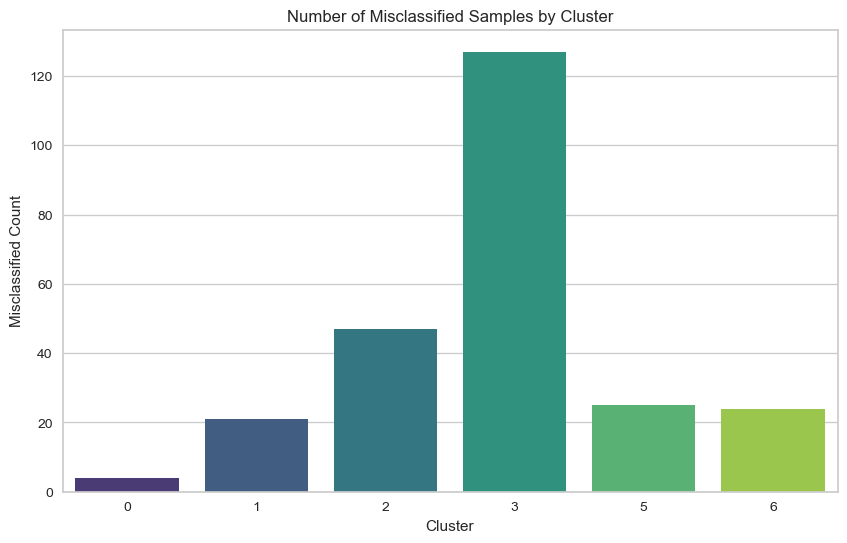

In [118]:
# Identify misclassified samples
misclassified = (mapped_predicted_labels != true_labels)

# Count misclassified samples by predicted cluster
cluster_names, misclassified_counts = np.unique(mapped_predicted_labels[misclassified], return_counts=True)

# Create a DataFrame for visualization
misclassified_df = pd.DataFrame({
    "Cluster": cluster_names,
    "Misclassified Count": misclassified_counts
})

plt.figure(figsize=(10, 6))
sns.barplot(x="Cluster", y="Misclassified Count", data=misclassified_df, palette="viridis")
plt.title("Number of Misclassified Samples by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Misclassified Count")
plt.show()

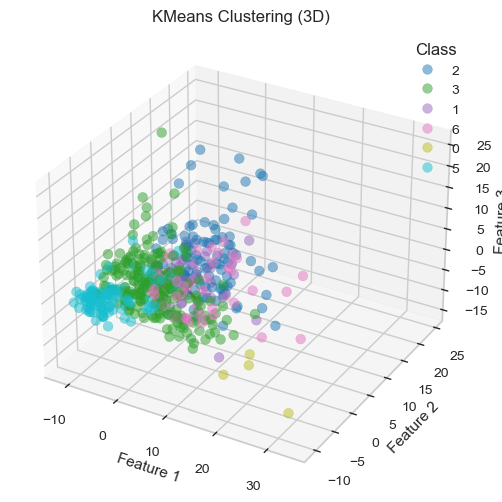

In [119]:
centroids = kmeans_model.cluster_centers_
visualise_3d_plot(df_zscore, mapped_predicted_labels, centroids)

As shown above the accuracy for the third attempt after applying NMF to the normalised dataset with 6 clusters using the algorithm elkan is still low. This suggests the lloyd algorithm is similar accuracy. Trying different clustering techniques is the next step.

In [121]:
agg_clustering_model = AgglomerativeClustering(n_clusters=6, linkage='ward')
agg_clustering_model_predicted_labels = agg_clustering_model.fit_predict(df_H_matrix)

In [122]:
mapped_predicted_labels = map_predicted_labels(agg_clustering_model_predicted_labels)
accuracy = accuracy_score(true_labels, mapped_predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.47347740667976423


In [123]:
ari = adjusted_rand_score(true_labels, mapped_predicted_labels)
nmi = normalized_mutual_info_score(true_labels, mapped_predicted_labels)

print(f"ARI: {ari}")
print(f"NMI: {nmi}")

ARI: 0.24019805407757452
NMI: 0.3579201318437112


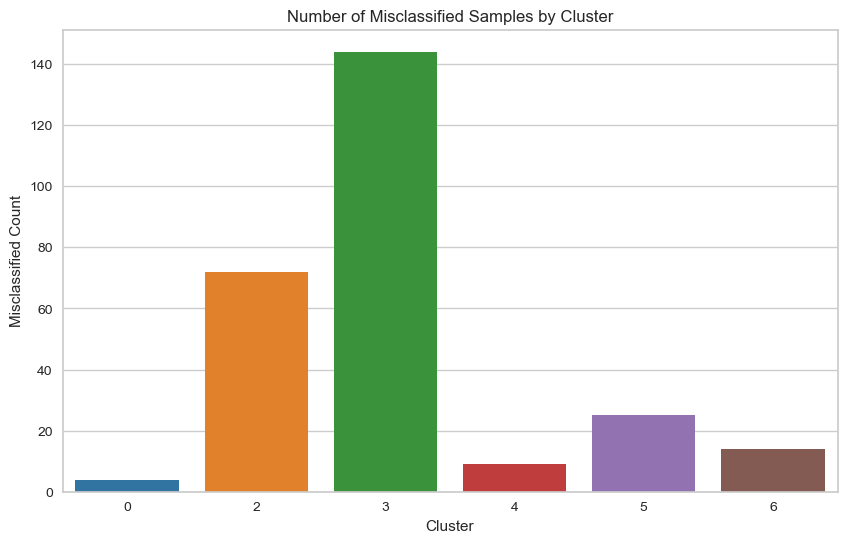

In [124]:
# Identify misclassified samples
misclassified = (mapped_predicted_labels != true_labels)

# Count misclassified samples by predicted cluster
cluster_names, misclassified_counts = np.unique(mapped_predicted_labels[misclassified], return_counts=True)

# Create a DataFrame for visualization
misclassified_df = pd.DataFrame({
    "Cluster": cluster_names,
    "Misclassified Count": misclassified_counts
})

plt.figure(figsize=(10, 6))
sns.barplot(x="Cluster", y="Misclassified Count", data=misclassified_df, palette="tab10")
plt.title("Number of Misclassified Samples by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Misclassified Count")
plt.show()

After applying the Agglomerative Clustering technique the accuracy has not improved, suggesting the single clustering technique approach is flawed. To ensure the single technique approach is definitely ineffective, trying two others is the next step.

In [126]:
spectral_clustering = SpectralClustering(n_clusters=6, affinity='nearest_neighbors', n_neighbors=140, random_state=42)
spectral_clustering.fit_predict(df_H_matrix)
spectral_predicted_labels = spectral_clustering.labels_

In [127]:
mapped_predicted_labels = map_predicted_labels(spectral_predicted_labels)
accuracy = accuracy_score(true_labels, mapped_predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.4577603143418468


In [128]:
ari = adjusted_rand_score(true_labels, mapped_predicted_labels)
nmi = normalized_mutual_info_score(true_labels, mapped_predicted_labels)

print(f"ARI: {ari}")
print(f"NMI: {nmi}")

ARI: 0.24103618721037467
NMI: 0.35044608283696865


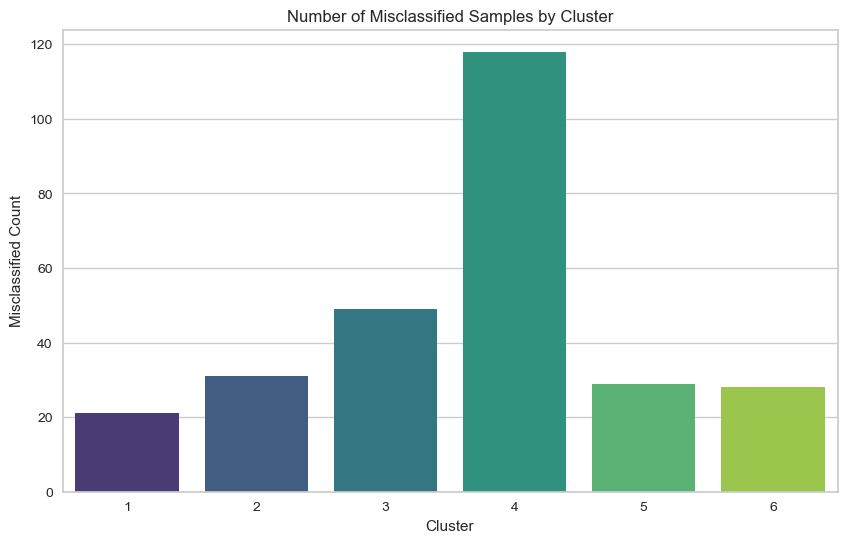

In [129]:
# Identify misclassified samples
misclassified = (mapped_predicted_labels != true_labels)

# Count misclassified samples by predicted cluster
cluster_names, misclassified_counts = np.unique(mapped_predicted_labels[misclassified], return_counts=True)

# Create a DataFrame for visualization
misclassified_df = pd.DataFrame({
    "Cluster": cluster_names,
    "Misclassified Count": misclassified_counts
})

plt.figure(figsize=(10, 6))
sns.barplot(x="Cluster", y="Misclassified Count", data=misclassified_df, palette="viridis")
plt.title("Number of Misclassified Samples by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Misclassified Count")
plt.show()

In [130]:
gmm_model = GaussianMixture(n_components=6, covariance_type='full', reg_covar=1e-6, random_state=42, init_params='kmeans')  # Adjust n_components for your data
gmm_model_predicted_labels = gmm_model.fit_predict(df_H_matrix)

In [131]:
mapped_predicted_labels = map_predicted_labels(gmm_model_predicted_labels)
accuracy = accuracy_score(true_labels, mapped_predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.5029469548133595


In [132]:
ari = adjusted_rand_score(true_labels, mapped_predicted_labels)
nmi = normalized_mutual_info_score(true_labels, mapped_predicted_labels)

print(f"ARI: {ari}")
print(f"NMI: {nmi}")

ARI: 0.2717219126390047
NMI: 0.3659066161573564


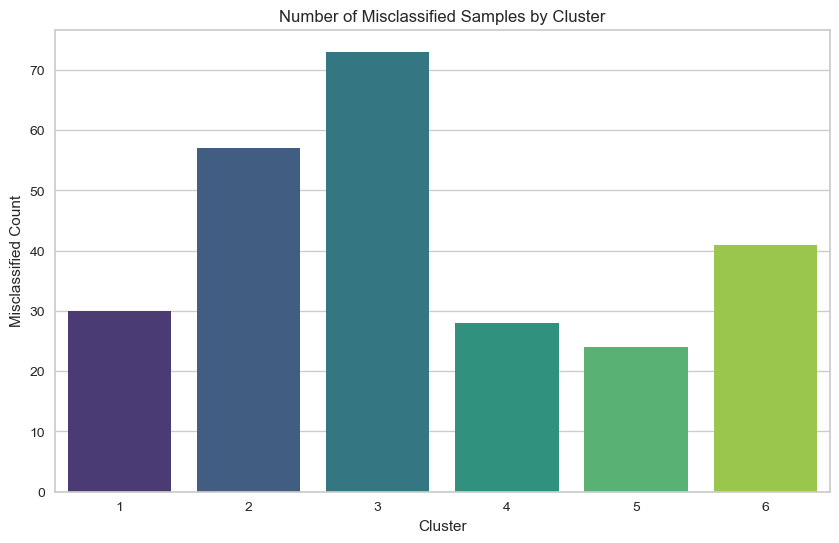

In [133]:
# Identify misclassified samples
misclassified = (mapped_predicted_labels != true_labels)

# Count misclassified samples by predicted cluster
cluster_names, misclassified_counts = np.unique(mapped_predicted_labels[misclassified], return_counts=True)

# Create a DataFrame for visualization
misclassified_df = pd.DataFrame({
    "Cluster": cluster_names,
    "Misclassified Count": misclassified_counts
})

plt.figure(figsize=(10, 6))
sns.barplot(x="Cluster", y="Misclassified Count", data=misclassified_df, palette="viridis")
plt.title("Number of Misclassified Samples by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Misclassified Count")
plt.show()

The attempt at increasing accuracy is through different clustering techniques shows no increase in accuracy for each attempt. The clustering seemst to misclassify the cluster 3 very heavily,and moderately misclassifying others. If the misclassifying of the cluster 3 is resolved the accuracy would greatly improve. Attempting consensus clustering to mitigate poor runs and aggregate results for a robus, reliable clustering approach is the next step.

In [135]:
def generate_clusterings(df, n_clusters, n_resamples=100, resample_fraction=0.8):
    n_samples = df.shape[0]
    clusterings = []

    for _ in range(n_resamples):
        # Resample the data
        resample_indices = np.random.choice(n_samples, int(resample_fraction * n_samples), replace=False)
        resampled_data = df.iloc[resample_indices]

        # Perform clustering 
        kmeans = KMeans(n_clusters=n_clusters, random_state=None)
        labels = kmeans.fit_predict(resampled_data)

        # Store results
        clusterings.append((resample_indices, labels))

    return clusterings

In [136]:
def build_consensus_matrix(df, clusterings, n_clusters):
    n_samples = df.shape[0]
    consensus_matrix = np.zeros((n_samples, n_samples))

    for indices, labels in clusterings:
        # Build a co-association matrix for this clustering run
        for i, idx1 in enumerate(indices):
            for j, idx2 in enumerate(indices):
                if labels[i] == labels[j]:
                    consensus_matrix[idx1, idx2] += 1

    # Normalize the consensus matrix
    consensus_matrix /= len(clusterings)
    return consensus_matrix

In [137]:
def recluster_consensus(consensus_matrix, n_clusters):
    # Convert consensus matrix to distance matrix
    distance_matrix = 1 - consensus_matrix

    # Apply Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='precomputed', linkage='average')
    final_labels = agg_clustering.fit_predict(distance_matrix)

    return final_labels

In [138]:
n_clusters = 6
n_resamples = 50
clusterings = generate_clusterings(df_H_matrix, n_clusters=n_clusters, n_resamples=n_resamples)

# Build the Consensus Matrix
consensus_matrix = build_consensus_matrix(df_H_matrix, clusterings, n_clusters=n_clusters)

# Re-Cluster on the Consensus Matrix
final_labels = recluster_consensus(consensus_matrix, n_clusters=n_clusters)

In [139]:
mapped_predicted_labels = map_predicted_labels(final_labels)
accuracy = accuracy_score(true_labels, mapped_predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.48526522593320237


In [140]:
ari = adjusted_rand_score(true_labels, mapped_predicted_labels)
nmi = normalized_mutual_info_score(true_labels, mapped_predicted_labels)

print(f"ARI: {ari}")
print(f"NMI: {nmi}")

ARI: 0.2428014819571929
NMI: 0.38099570532475757


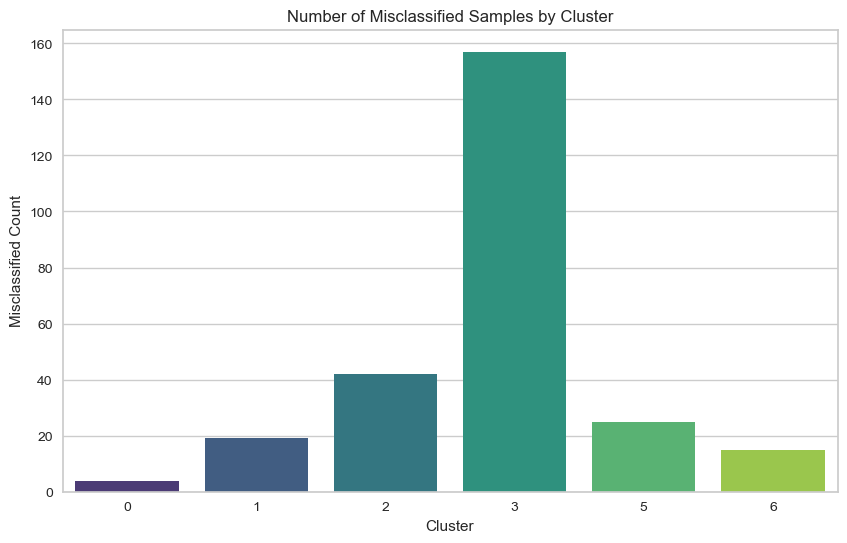

In [141]:
# Identify misclassified samples
misclassified = (mapped_predicted_labels != true_labels)

# Count misclassified samples by predicted cluster
cluster_names, misclassified_counts = np.unique(mapped_predicted_labels[misclassified], return_counts=True)

# Create a DataFrame for visualization
misclassified_df = pd.DataFrame({
    "Cluster": cluster_names,
    "Misclassified Count": misclassified_counts
})

plt.figure(figsize=(10, 6))
sns.barplot(x="Cluster", y="Misclassified Count", data=misclassified_df, palette="viridis")
plt.title("Number of Misclassified Samples by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Misclassified Count")
plt.show()

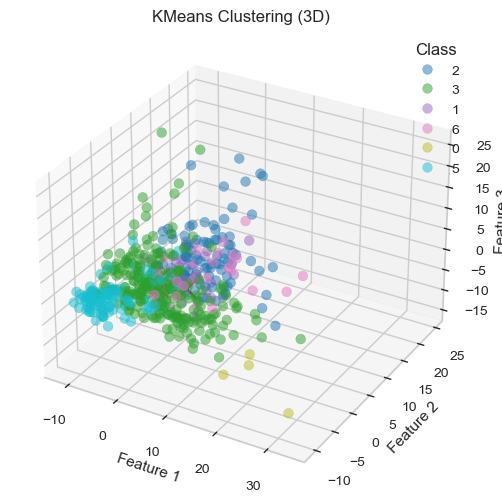

In [142]:
# Compute Centroids
def compute_centroids(df, labels):
    unique_labels = np.unique(labels)
    centroids = []
    for label in unique_labels:
        cluster_points = df[labels == label]  # Filter points belonging to the cluster
        centroid = cluster_points.mean(axis=0)  # Compute mean for the cluster
        centroids.append(centroid)
    return np.array(centroids)

centroids = compute_centroids(df_H_matrix, final_labels)

visualise_3d_plot(df_zscore, mapped_predicted_labels, centroids)

The accuracy is still under 50%. The cluster 3 is still being misclassified. These may not be the same cluster over the different runs such as K-means or Spectral clustering but the techniques always greatly misclassify one cluster, resulting in poor classification accuracy. Another technique is attempted next to offer a differing approach and to resolve the low accuracy.

In [144]:
# Number of clusters
n_clusters = 6

data_array = df_H_matrix.values  # Convert DataFrame to NumPy array

# Initialize medoids (random selection of indices)
initial_medoids = np.random.choice(len(data_array), n_clusters, replace=False).tolist()

# Create PAM instance
pam = kmedoids(data_array, initial_medoids, metric=distance_metric(type_metric.EUCLIDEAN))

# Run PAM
pam.process()

# Get clustering results
cluster_labels = pam.predict(data_array)  

In [145]:
mapped_predicted_labels = map_predicted_labels(cluster_labels)
accuracy = accuracy_score(true_labels, mapped_predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.44597249508840864


In [146]:
ari = adjusted_rand_score(true_labels, mapped_predicted_labels)
nmi = normalized_mutual_info_score(true_labels, mapped_predicted_labels)

print(f"ARI: {ari}")
print(f"NMI: {nmi}")

ARI: 0.23491010382168856
NMI: 0.33191100758221737


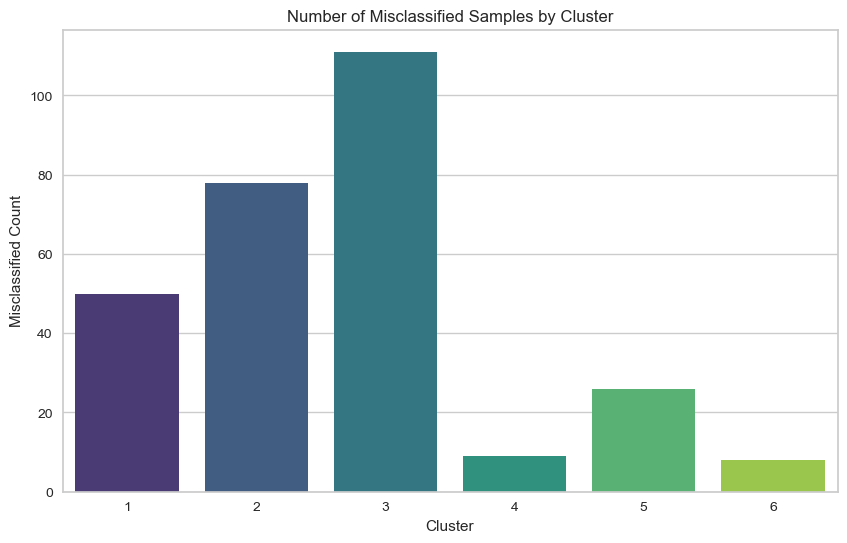

In [147]:
# Identify misclassified samples
misclassified = (mapped_predicted_labels != true_labels)

# Count misclassified samples by predicted cluster
cluster_names, misclassified_counts = np.unique(mapped_predicted_labels[misclassified], return_counts=True)

# Create a DataFrame for visualization
misclassified_df = pd.DataFrame({
    "Cluster": cluster_names,
    "Misclassified Count": misclassified_counts
})

plt.figure(figsize=(10, 6))
sns.barplot(x="Cluster", y="Misclassified Count", data=misclassified_df, palette="viridis")
plt.title("Number of Misclassified Samples by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Misclassified Count")
plt.show()

The final technique attempted PAM, has shown a decrease in accuracy. The results from the clustering method suggest the preprocessing or NMF is not adequately applied. The other normalisation techniques have been tried with the same results. The next step would be to seek guidance on the NMF application, imputation technique and other normalisation methods. Applying this clustering analysis on another dataset would be valuable in discerning which part of the analysis causes the accuracy to be so low.

**Discussing about the issues and improving the algorithm:**

K-Means relies on Euclidean distance, making it sensitive to outliers that can distort cluster centroids. Possibly an improvement could be to apply outlier removal techniques, however as the dataset is in relation to cancer outliers may hold important information. This makes removing outliers risky and would require a thoroughly thought through approach. 

As gene expression data often involves overlapping biological pathways, making clusters less distinct the clustering performance struggled to distinguish between overlapping clusters. To resolve this a method like the probabilistic clustering of Gaussian Mixture Models was applied, however with no improvement in the accuracy. Another approach was to use kernel-based clustering techniques like Spectral Clustering to capture non-linear relationships, however this also failed to improve performance. An approach that could work would be semi-supervised learning as the true labels are known. 

**Discussing about how to 
apply/implement correctly a reliable clustering mode.:**

Preprocessing is essential, imputing missing values is key as they can distort the clustering process and lead to unreliable or meaningless results. Normalising the dataset ensures that all features contribute equally to clustering, especially when using distance-based methods. As high-dimensional data increases the risk of overfitting and reduces clustering accuracy, applying a projection technique such as NMF is an important step. 

Applying consensus clustering is a reliable method for cluster analysis, especially for datasets like TCGA, where the complexity and dimensionality of the data can lead to variability in clustering results. Consensus clustering achieves this by minimising variability caused by randomness, algorithm choice, or parameter settings and ensure reproducible clusters.

Adjusted Rand Index (ARI), Normalised Mutual Information (NMI), and the Confusion Matrix provides a comprehensive evaluation of clustering results. As measures the agreement between predicted clusters and true labels, adjusted for chance, this allows insights into the clustering results apart from whether the predicted labels are correct. Using NMI to measure shared information between predicted clustrers and true labels giving another measure to compare across clustering approaches. The use of a confusion matrix, provides a definite way to check how many predictions the clustering approach got correct. This is the ultimate measure of clustering accuracy as the end result is measured.

**Discussing the challenges of implementation:**

Consensus clustering on high-dimensional datasets like TCGA, this can be computationally expensive and time-intensive, especially on a single laptop. Poorly chosen algorithms, incorrect parameter settings, or insufficient iterations may lead to unreliable clustering results. The outlier data points can significantly affect the clustering process and distort the consensus matrix, however these may hold improtant information so handling these values is complicated. NMF can improve computational efficiency but may also discard biologically relevant information leading to poorer clustering results, in this case the NMF approach improved accuracy but still fell short the 90% accuracy mark. Improper imputation can introduce bias or distort cluster formation reducing clustering accuracy, using the best approach is not simple and may require more domain knowledge in relation to the TCGA datset and biological pathways. 